# Final Project - Predicting Coffee Quality #

## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import export_graphviz
import pydot
from IPython.display import Image
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl


import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

## 2. Load data & get to know it

In [2]:
data = pd.read_csv('merged_data_cleaned.csv')
data.head()

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [3]:
data.shape

(1339, 44)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1339 non-null   int64  
 1   Species                1339 non-null   object 
 2   Owner                  1332 non-null   object 
 3   Country.of.Origin      1338 non-null   object 
 4   Farm.Name              980 non-null    object 
 5   Lot.Number             276 non-null    object 
 6   Mill                   1021 non-null   object 
 7   ICO.Number             1182 non-null   object 
 8   Company                1130 non-null   object 
 9   Altitude               1113 non-null   object 
 10  Region                 1280 non-null   object 
 11  Producer               1107 non-null   object 
 12  Number.of.Bags         1339 non-null   int64  
 13  Bag.Weight             1339 non-null   object 
 14  In.Country.Partner     1339 non-null   object 
 15  Harv

In [5]:
data.describe()

,Unnamed: 0,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1338.000000,1339.000000,1109.000000,1109.000000,1109.000000
mean,669.000000,154.182972,7.566706,7.520426,7.401083,7.535706,7.517498,7.518013,9.834877,9.835108,9.856692,7.503376,82.089851,0.088379,0.479462,0.173393,3.556385,1750.713315,1799.347775,1775.030545
std,386.680316,129.987162,0.377560,0.398442,0.404463,0.379827,0.370064,0.408943,0.554591,0.763946,0.616102,0.473464,3.500575,0.048287,2.549683,0.832121,5.312541,8669.440545,8668.805771,8668.626080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,334.500000,14.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.080000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,669.000000,175.000000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,1003.500000,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,1338.000000,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.280000,63.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


In [6]:
# quite some missing data that has to be cleand up
data.isna().sum()

Unnamed: 0                  0
Species                     0
Owner                       7
Country.of.Origin           1
Farm.Name                 359
Lot.Number               1063
Mill                      318
ICO.Number                157
Company                   209
Altitude                  226
Region                     59
Producer                  232
Number.of.Bags              0
Bag.Weight                  0
In.Country.Partner          0
Harvest.Year               47
Grading.Date                0
Owner.1                     7
Variety                   226
Processing.Method         170
Aroma                       0
Flavor                      0
Aftertaste                  0
Acidity                     0
Body                        0
Balance                     0
Uniformity                  0
Clean.Cup                   0
Sweetness                   0
Cupper.Points               0
Total.Cup.Points            0
Moisture                    0
Category.One.Defects        0
Quakers   

# 3. Data Cleaning

In [7]:
# function for renaming the columns
def renaming (df):
    df.columns = df.columns.str.lower()
    cols = []
    for i in range(len(df.columns)):
        cols.append(df.columns[i].lower().replace(' ', '_'))
    df.columns = cols
    print(df.columns)

In [8]:
renaming(data)
data

Index(['unnamed:_0', 'species', 'owner', 'country.of.origin', 'farm.name',
       'lot.number', 'mill', 'ico.number', 'company', 'altitude', 'region',
       'producer', 'number.of.bags', 'bag.weight', 'in.country.partner',
       'harvest.year', 'grading.date', 'owner.1', 'variety',
       'processing.method', 'aroma', 'flavor', 'aftertaste', 'acidity', 'body',
       'balance', 'uniformity', 'clean.cup', 'sweetness', 'cupper.points',
       'total.cup.points', 'moisture', 'category.one.defects', 'quakers',
       'color', 'category.two.defects', 'expiration', 'certification.body',
       'certification.address', 'certification.contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')


,unnamed:_0,species,owner,country.of.origin,farm.name,lot.number,mill,ico.number,company,altitude,region,producer,number.of.bags,bag.weight,in.country.partner,harvest.year,grading.date,owner.1,variety,processing.method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean.cup,sweetness,cupper.points,total.cup.points,moisture,category.one.defects,quakers,color,category.two.defects,expiration,certification.body,certification.address,certification.contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,1334,Robusta,luis robles,Ecuador,robustasa,Lavado 1,our own lab,NaN,robustasa,NaN,"san juan, playas",Café Robusta del Ecuador S.A.,1,2 kg,Specialty Coffee Association,2016,"January 19th, 2016",Luis Robles,NaN,NaN,7.75,7.58,7.33,7.58,5.08,7.83,10.00,10.00,7.75,7.83,78.75,0.00,0,0.0,Blue-Green,1,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,NaN,NaN,NaN
1335,1335,Robusta,luis robles,Ecuador,robustasa,Lavado 3,own laboratory,NaN,robustasa,40,"san juan, playas",Café Robusta del Ecuador S.A.,1,2 kg,Specialty Coffee Association,2016,"January 19th, 2016",Luis Robles,NaN,NaN,7.50,7.67,7.75,7.75,5.17,5.25,10.00,10.00,8.42,8.58,78.08,0.00,0,0.0,Blue-Green,0,"January 18th, 2017",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,40.0,40.0,40.0
1336

In [9]:
data[data['owner'].isna()]

,unnamed:_0,species,owner,country.of.origin,farm.name,lot.number,mill,ico.number,company,altitude,region,producer,number.of.bags,bag.weight,in.country.partner,harvest.year,grading.date,owner.1,variety,processing.method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean.cup,sweetness,cupper.points,total.cup.points,moisture,category.one.defects,quakers,color,category.two.defects,expiration,certification.body,certification.address,certification.contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
364,364,Arabica,NaN,Honduras,los hicaques,NaN,cigrah sps,13-111-240,cigrah,1350,comayagua,Reynerio Zepeda,275,1 kg,Instituto Hondureño del Café,2014/2015,"April 8th, 2014",NaN,Caturra,Natural / Dry,7.67,7.50,7.67,7.50,7.67,7.67,10.0,10.0,10.0,7.83,83.50,0.10,0,0.0,Green,3,"April 8th, 2015",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1350.0,1350.0,1350.0
459,459,Arabica,NaN,Honduras,los hicaques,NaN,cigrah sps,13-111-193,cigrah,1350,comayagua,Reynerio Zepeda,275,1 kg,Instituto Hondureño del Café,2014/2015,"April 8th, 2014",NaN,Caturra,Natural / Dry,7.67,7.67,7.50,7.67,7.50,7.67,10.0,10.0,10.0,7.50,83.17,0.11,0,0.0,Green,3,"April 8th, 2015",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1350.0,1350.0,1350.0
602,602,Arabica,NaN,Colombia,supply chain ecom cca s.a.,NaN,south huila,3-79-0334,ecom cca s.a.,1400 thru 1850,south huila,Supply Chain ECOM CCA S.A.,250,70 kg,Almacafé,2012,"April 11th, 2012",NaN,Caturra,Washed / Wet,7.50,7.58,7.42,7.67,7.50,7.58,10.0,10.0,10.0,7.50,82.75,0.00,0,0.0,Blue-Green,0,"April 11th, 2013",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1400.0,1850.0,1625.0
848,848,Arabica,NaN,Honduras,gran manzana y el aguacate,NaN,cigrah sps,13-111-311,cigrah,1350,comayagua,"Tomás Sosa, Juan Damaso",275,1 kg,Instituto Hondureño del Café,2014,"May 16th, 2014",NaN,Caturra,Natural / Dry,7.50,7.50,7.33,7.33,7.33,7.33,10.0,10.0,10.0,7.50,81.83,0.10,0,0.0,Green,4,"May 16th, 2015",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1350.0,1350.0,1350.0
882,882,Arabica,NaN,Honduras,gran manzana y el aguacate,NaN,cigrah sps,13-111-192,cigrah,1400,comayagua,"Tomás Sosa, Juan Damaso",275,1 kg,Instituto Hondureño del Café,2014,"May 16th, 2014",NaN,Caturra,Natural / Dry,7.50,7.33,7.50,7.50,7.17,7.17,10.0,10.0,10.0,7.50,81.67,0.10,0,0.0,Green,5,"May 16th, 2015",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1400.0,1400.0,1400.0
975,975,Arabica,NaN,Honduras,los hicaques,NaN,cigrah,13-111-037,cigrah,1450 mals,central region,Reinerio Zepeda,275,1 kg,Instituto Hondureño del Café,2015,"March 11th, 2015",NaN,Catuai,Natural / Dry,7.42,7.33,7.00,7.42,7.33,7.33,10.0,10.0,10.0,7.33,81.17,0.13,0,0.0,Green,1,"March 10th, 2016",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1450.0,1450.0,1450.0
1044,1044,Arabica,NaN,Honduras,los hicaques,NaN,cigrah,13-111-035,cigrah,1450 mals,central region,Reinerio Zepeda,275,1 kg,Instituto Hondureño del Café,2015,"March 11th, 2015",NaN,Catuai,Natural / Dry,7.25,7.33,7.08,7.50,7.25,7.33,10.0,10.0,10.0,7.00,80.75,0.13,0,0.0,Green,1,"March 10th, 2016",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1450.0,1450.0,1450.0


In [10]:
# droping unnessecary columns
# some have too much null values
# some have the same informations as other columns

data1 = data.drop(['unnamed:_0','farm.name','lot.number', 'mill','ico.number','company','altitude','region','producer','number.of.bags','bag.weight','in.country.partner','grading.date','owner.1','total.cup.points','expiration','certification.body','certification.address','certification.contact','unit_of_measurement','altitude_low_meters','altitude_high_meters'], axis=1)
data1.head()

,species,owner,country.of.origin,harvest.year,variety,processing.method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean.cup,sweetness,cupper.points,moisture,category.one.defects,quakers,color,category.two.defects,altitude_mean_meters
0,Arabica,metad plc,Ethiopia,2014,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.0,10.0,10.0,8.75,0.12,0,0.0,Green,0,2075.0
1,Arabica,metad plc,Ethiopia,2014,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.0,10.0,10.0,8.58,0.12,0,0.0,Green,1,2075.0
2,Arabica,grounds for health admin,Guatemala,NaN,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.0,10.0,10.0,9.25,0.00,0,0.0,NaN,0,1700.0
3,Arabica,yidnekachew dabessa,Ethiopia,2014,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.0,10.0,10.0,8.67,0.11,0,0.0,Green,2,2000.0
4,Arabica,metad plc,Ethiopia,2014,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.0,10.0,10.0,8.58,0.12,0,0.0,Green,2,2075.0


In [11]:
data1.isna().sum()

species                   0
owner                     7
country.of.origin         1
harvest.year             47
variety                 226
processing.method       170
aroma                     0
flavor                    0
aftertaste                0
acidity                   0
body                      0
balance                   0
uniformity                0
clean.cup                 0
sweetness                 0
cupper.points             0
moisture                  0
category.one.defects      0
quakers                   1
color                   218
category.two.defects      0
altitude_mean_meters    230
dtype: int64

In [12]:
data1[data1['owner'].isna()]

,species,owner,country.of.origin,harvest.year,variety,processing.method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean.cup,sweetness,cupper.points,moisture,category.one.defects,quakers,color,category.two.defects,altitude_mean_meters
364,Arabica,NaN,Honduras,2014/2015,Caturra,Natural / Dry,7.67,7.50,7.67,7.50,7.67,7.67,10.0,10.0,10.0,7.83,0.10,0,0.0,Green,3,1350.0
459,Arabica,NaN,Honduras,2014/2015,Caturra,Natural / Dry,7.67,7.67,7.50,7.67,7.50,7.67,10.0,10.0,10.0,7.50,0.11,0,0.0,Green,3,1350.0
602,Arabica,NaN,Colombia,2012,Caturra,Washed / Wet,7.50,7.58,7.42,7.67,7.50,7.58,10.0,10.0,10.0,7.50,0.00,0,0.0,Blue-Green,0,1625.0
848,Arabica,NaN,Honduras,2014,Caturra,Natural / Dry,7.50,7.50,7.33,7.33,7.33,7.33,10.0,10.0,10.0,7.50,0.10,0,0.0,Green,4,1350.0
882,Arabica,NaN,Honduras,2014,Caturra,Natural / Dry,7.50,7.33,7.50,7.50,7.17,7.17,10.0,10.0,10.0,7.50,0.10,0,0.0,Green,5,1400.0
975,Arabica,NaN,Honduras,2015,Catuai,Natural / Dry,7.42,7.33,7.00,7.42,7.33,7.33,10.0,10.0,10.0,7.33,0.13,0,0.0,Green,1,1450.0
1044,Arabica,NaN,Honduras,2015,Catuai,Natural / Dry,7.25,7.33,7.08,7.50,7.25,7.33,10.0,10.0,10.0,7.00,0.13,0,0.0,Green,1,1450.0


In [13]:
# filling missing owner values with the name of the company
data1['owner'] = data1['owner'].fillna(data['company'])

In [14]:
data1[data1['country.of.origin'].isna()]

,species,owner,country.of.origin,harvest.year,variety,processing.method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean.cup,sweetness,cupper.points,moisture,category.one.defects,quakers,color,category.two.defects,altitude_mean_meters
1197,Arabica,racafe & cia s.c.a,NaN,NaN,NaN,NaN,6.75,6.75,6.42,6.83,7.58,7.5,10.0,10.0,10.0,7.25,0.1,0,0.0,NaN,3,NaN


In [15]:
#droping this rows because I can't find information from where it is and it's only one column
data1=data1.dropna(subset=['country.of.origin'])

In [16]:
data1['variety'].value_counts()

Caturra                  256
Bourbon                  226
Typica                   211
Other                    110
Catuai                    74
Hawaiian Kona             44
Yellow Bourbon            35
Mundo Novo                33
Catimor                   20
SL14                      17
SL28                      15
Pacas                     13
Gesha                     12
Pacamara                   8
SL34                       8
Arusha                     6
Peaberry                   5
Sumatra                    3
Mandheling                 3
Ruiru 11                   2
Ethiopian Yirgacheffe      2
Blue Mountain              2
Java                       2
Moka Peaberry              1
Marigojipe                 1
Pache Comun                1
Sulawesi                   1
Ethiopian Heirlooms        1
Sumatra Lintong            1
Name: variety, dtype: int64

In [17]:
#don't want to take the mode here because variety shows some special coffees and can have a high impact on the target value
data1['variety'] = data1['variety'].fillna('Other')

In [18]:
data1['processing.method'].value_counts()

Washed / Wet                 815
Natural / Dry                258
Semi-washed / Semi-pulped     56
Other                         26
Pulped natural / honey        14
Name: processing.method, dtype: int64

In [19]:
#filling in missing values with "others" because there are already others
data1['processing.method'] = data1['processing.method'].fillna('Other')

In [20]:
data1[data1['quakers'].isna()]

,species,owner,country.of.origin,harvest.year,variety,processing.method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean.cup,sweetness,cupper.points,moisture,category.one.defects,quakers,color,category.two.defects,altitude_mean_meters
366,Arabica,exportadora de cafe condor s.a,Colombia,2013,Caturra,Washed / Wet,7.58,7.67,7.58,7.75,7.58,7.75,10.0,10.0,10.0,7.58,0.11,0,NaN,Green,2,1750.0


In [21]:
data1['quakers'].value_counts()

0.0     1243
1.0       39
2.0       30
3.0        5
5.0        5
4.0        5
6.0        4
7.0        3
8.0        1
9.0        1
11.0       1
Name: quakers, dtype: int64

In [22]:
data1['quakers'] = data1['quakers'].fillna('0.0')

In [23]:
# changing the datatype from object to integer
data1['quakers'] = data1['quakers'].astype(float).astype(int)

In [24]:
data1['color'].value_counts()

Green           870
Bluish-Green    114
Blue-Green       85
None             52
Name: color, dtype: int64

In [25]:
#filling in missing values with "Green" because it's the most appearing value
data1['color'] = data1['color'].fillna('Green')

In [26]:
#coffee can't be transparent so changing "none" to "Green"
data1['color']= [column.replace('None','Green')for column in data1['color']]

In [27]:
# fillinf in missing values with the mean
altitude_mean = data1['altitude_mean_meters'].mean()
data1['altitude_mean_meters'] = data1['altitude_mean_meters'].fillna(altitude_mean)

In [28]:
data1['harvest.year'].value_counts()

2012                        354
2014                        233
2013                        181
2015                        129
2016                        124
2017                         70
2013/2014                    29
2015/2016                    28
2011                         26
2014/2015                    19
2017 / 2018                  19
2009/2010                    12
2010                         10
2016 / 2017                   6
2010-2011                     6
4T/10                         4
March 2010                    3
2009-2010                     3
Mayo a Julio                  3
4T/2010                       3
2011/2012                     2
January 2011                  2
Abril - Julio                 2
08/09 crop                    2
December 2009-March 2010      1
Abril - Julio /2011           1
1t/2011                       1
2018                          1
2009 / 2010                   1
1T/2011                       1
47/2010                       1
August t

In [29]:
# only taking the last 4 digits as value --> so we only get the year
data1['harvest.year'] = data1['harvest.year'].str[-4:]
data1['harvest.year'].value_counts()

2012    356
2014    262
2013    181
2016    152
2015    148
2017     77
2011     39
2010     39
2018     20
ulio      5
T/10      4
crop      2
TEST      1
2009      1
gust      1
mmm       1
mber      1
bia.      1
pril      1
Name: harvest.year, dtype: int64

In [30]:
# drop rows with a value count smaller than 19 --> remove weird values
counts = data1['harvest.year'].value_counts()
data1 = data1[data1['harvest.year'].isin(counts[counts > 19].index)]

In [31]:
data1['harvest.year'].value_counts()

2012    356
2014    262
2013    181
2016    152
2015    148
2017     77
2011     39
2010     39
2018     20
Name: harvest.year, dtype: int64

In [32]:
#chaning the datatype the model gets it right
data1['harvest.year'] = data1['harvest.year'].astype(object)

In [33]:
data1['aroma'].value_counts()

7.67    177
7.50    157
7.58    145
7.42    117
7.75    116
7.83     99
7.33     92
7.25     72
7.92     55
8.00     48
7.17     42
7.08     27
7.00     23
8.17     19
8.08     18
6.92     14
6.83      9
8.25      9
8.42      8
6.75      5
8.33      5
8.50      3
8.67      2
6.50      2
6.67      2
6.17      1
0.00      1
8.58      1
6.33      1
7.81      1
5.08      1
6.42      1
8.75      1
Name: aroma, dtype: int64

In [34]:
# there are 0 values that doesn't make sense so I drop this row
data1 = data1.drop(data1[data1.aroma == 0].index)

In [35]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273 entries, 0 to 1338
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   species               1273 non-null   object 
 1   owner                 1273 non-null   object 
 2   country.of.origin     1273 non-null   object 
 3   harvest.year          1273 non-null   object 
 4   variety               1273 non-null   object 
 5   processing.method     1273 non-null   object 
 6   aroma                 1273 non-null   float64
 7   flavor                1273 non-null   float64
 8   aftertaste            1273 non-null   float64
 9   acidity               1273 non-null   float64
 10  body                  1273 non-null   float64
 11  balance               1273 non-null   float64
 12  uniformity            1273 non-null   float64
 13  clean.cup             1273 non-null   float64
 14  sweetness             1273 non-null   float64
 15  cupper.points        

In [36]:
#checking if I missed any null values
data1.isna().sum()

species                 0
owner                   0
country.of.origin       0
harvest.year            0
variety                 0
processing.method       0
aroma                   0
flavor                  0
aftertaste              0
acidity                 0
body                    0
balance                 0
uniformity              0
clean.cup               0
sweetness               0
cupper.points           0
moisture                0
category.one.defects    0
quakers                 0
color                   0
category.two.defects    0
altitude_mean_meters    0
dtype: int64

In [37]:
#checking if I missed any weird values in the dataset
data1.sample(30)

,species,owner,country.of.origin,harvest.year,variety,processing.method,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean.cup,sweetness,cupper.points,moisture,category.one.defects,quakers,color,category.two.defects,altitude_mean_meters
1276,Arabica,juana rodriguez gutierrez,Mexico,2012,Pacamara,Washed / Wet,7.50,7.25,6.92,7.00,7.17,6.83,8.00,8.00,10.00,6.83,0.11,4,0,Green,20,1100.000000
162,Arabica,federacion nacional de cafeteros,Colombia,2016,Other,Washed / Wet,8.08,7.67,7.83,7.83,7.67,7.67,10.00,10.00,10.00,7.75,0.12,1,0,Green,0,1800.000000
201,Arabica,tembo coffee company ltd,"Tanzania, United Republic Of",2014,Other,Washed / Wet,7.83,7.67,7.75,7.83,7.67,7.67,10.00,10.00,10.00,7.83,0.12,0,0,Green,7,1620.000000
83,Arabica,juan luis alvarado romero,Guatemala,2016,Bourbon,Other,8.00,7.92,7.75,8.00,7.92,7.83,10.00,10.00,10.00,7.83,0.10,0,2,Green,2,1775.030545
465,Arabica,saul m. hernandez ramirez,Mexico,2012,Typica,Washed / Wet,7.75,7.67,7.58,7.50,7.42,7.58,10.00,10.00,10.00,7.67,0.12,3,0,Green,8,532.000000
699,Arabica,olivia hernandez virves,Mexico,2012,Bourbon,Washed / Wet,7.67,7.58,7.33,7.42,7.58,7.33,10.00,10.00,10.00,7.50,0.13,0,0,Green,4,1250.000000
279,Arabica,ipanema coffees,Brazil,2016,Yellow Bourbon,Natural / Dry,7.25,7.58,7.42,8.00,7.75,7.83,10.00,10.00,10.00,8.00,0.00,0,0,Green,0,1.000000
157,Arabica,nucoffee,Brazil,2011,Catuai,Semi-washed / Semi-pulped,8.50,8.00,7.50,7.75,7.50,7.83,10.00,10.00,10.00,7.50,0.11,0,0,Blue-Green,1,1100.000000
574,Arabica,alfredo bojalil,Mexico,2012,Bourbon,Washed / Wet,7.67,7.58,7.42,7.75,7.42,7.42,10.00,10.00,10.00,7.58,0.12,0,0,Blue-Green,7,1250.000000
919,Arabica,"lin, che-hao krude 林哲豪",Taiwan,2014,Typica,Washed / Wet,7.42,7.33,7.67,7.33,7.42,7.50,10.00,10.00,9.33,7.50,0.11,0,0,Blue-Green,0,900.000000


In [38]:
data1.shape

(1273, 22)

In [39]:
#checking for duplicates
data1 = data1.drop_duplicates()
data1.shape

(1273, 22)

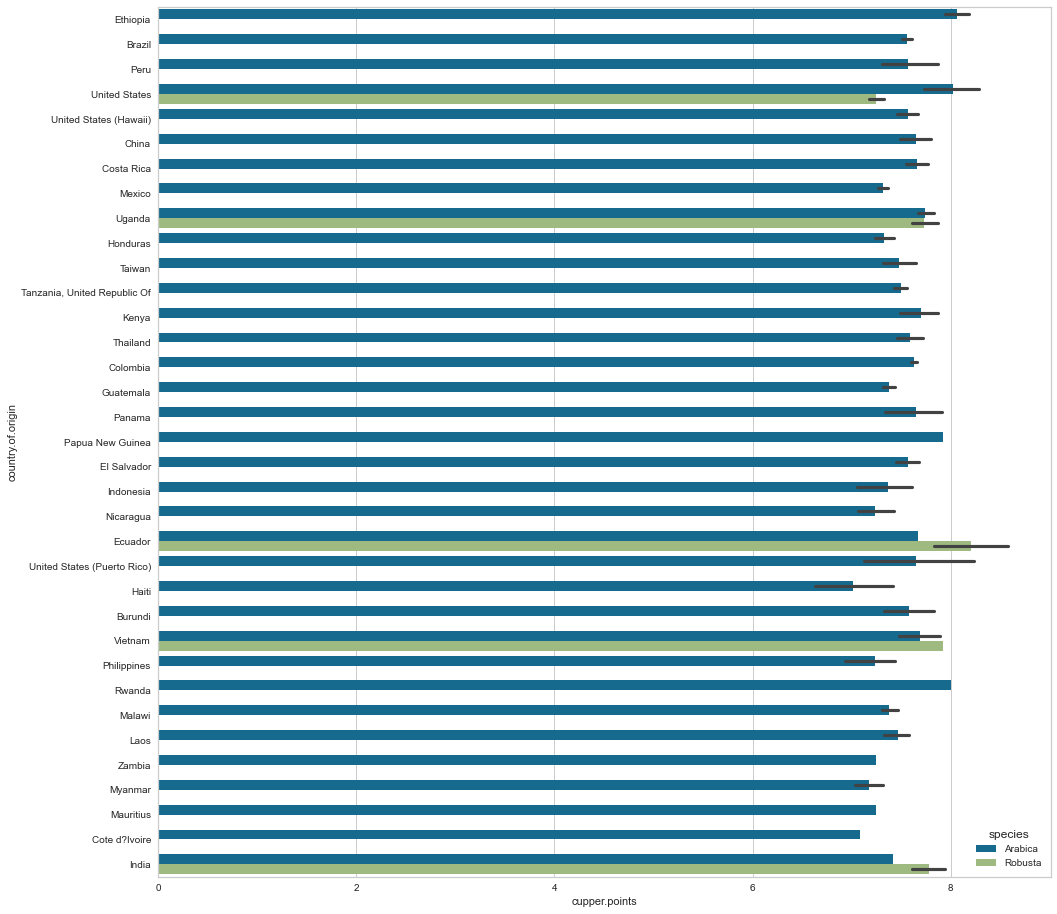

In [40]:
# checking target column vs country
# there areonly 5 countries that grow robusta

plt.figure(figsize=(16,16))

sns.barplot(y="country.of.origin", x="cupper.points", hue='species', data=data1)
plt.show()

# 4. EDA & Data Preprocessing

## 4.1 Categorical Data

In [41]:
#selecting only categoricals
cat = data1.select_dtypes(include = object)
cat

,species,owner,country.of.origin,harvest.year,variety,processing.method,color
0,Arabica,metad plc,Ethiopia,2014,Other,Washed / Wet,Green
1,Arabica,metad plc,Ethiopia,2014,Other,Washed / Wet,Green
3,Arabica,yidnekachew dabessa,Ethiopia,2014,Other,Natural / Dry,Green
4,Arabica,metad plc,Ethiopia,2014,Other,Washed / Wet,Green
5,Arabica,ji-ae ahn,Brazil,2013,Other,Natural / Dry,Bluish-Green
...,...,...,...,...,...,...,...
1334,Robusta,luis robles,Ecuador,2016,Other,Other,Blue-Green
1335,Robusta,luis robles,Ecuador,2016,Other,Other,Blue-Green
1336,Robusta,james moore,United States,2014,Other,Natural / Dry,Green
1337,Robusta,cafe politico,India,2013,Other,Natural / Dry,Green


In [42]:
#checking the count of every value in every column 
for col in cat.columns:
    print(cat[col].value_counts())

Arabica    1245
Robusta      28
Name: species, dtype: int64
juan luis alvarado romero         154
racafe & cia s.c.a                 51
exportadora de cafe condor s.a     50
ipanema coffees                    50
cqi taiwan icp cqi台灣合作夥伴           47
                                 ... 
sarawut premjit                     1
juan luis ortega carballo           1
edwin agasso                        1
santiago solis ayerdi               1
mario jose fernandez                1
Name: owner, Length: 309, dtype: int64
Mexico                          233
Guatemala                       177
Colombia                        168
Brazil                          127
Taiwan                           75
United States (Hawaii)           53
Honduras                         52
Costa Rica                       49
Ethiopia                         42
Tanzania, United Republic Of     40
Uganda                           36
Thailand                         27
Kenya                            23
Nicaragua      

In [43]:
# reducing unique values in the column "owner" - step 1: getting a list with values that appear less than 3 times

vals_owner = pd.DataFrame(cat['owner'].value_counts())
vals_owner = vals_owner.reset_index()
vals_owner.columns = ['owner', 'counts']
group_vals_owner_df = vals_owner[vals_owner['counts']<3]
group_vals_owner = list(group_vals_owner_df['owner'])
group_vals_owner

['kyagalanyi coffee ltd',
 'victoria',
 'grupo cafetalero los brujos spr de rl',
 'royal base corporation',
 'rosa aurora falcon fernandez',
 'max gurdian',
 'owen carver',
 'j.andrade',
 'rashid moledina & co. (msa) ltd.',
 'modesto landeros flores',
 'juana rodriguez gutierrez',
 'balam hinyula',
 'beneficio santa rosa',
 'joshua marsceau',
 'ibero kenya limited',
 'kyagalanyi ltd',
 'carl walker',
 'kennedy macharia',
 'janny marlith torres',
 'balbino ramirez flores',
 'ji-ae ahn',
 'maria luisa del carmen rojas narvaez',
 'jesus salazar velasco',
 'simon mahinda',
 'seid damtew coffee planataion',
 'luis robles',
 'adam kline',
 'cooperativa el gorrion r.l',
 'dream together',
 'andrew bowman',
 'raúl vargas',
 'fabian calderon mora',
 'ngorogoro convenant estate',
 'obed rendon ponce',
 'marco virgilio ramirez teliz',
 'eric jesus cordoba arroyo',
 'elsy reyes',
 'young kim',
 'great lakes coffee uganda',
 'ucfa',
 'daniel magu',
 'jungle estate',
 'guillermo rojas saldana',
 'ca

In [44]:
# reducing unique values in the column "owner" - step 2: replacing the values from the list above with "other"
def clean_vals_owner(x):
    if x in group_vals_owner:
        return 'other'
    else:
        return x

cat['owner'] = list(map(clean_vals_owner, cat['owner']))

In [45]:
cat['owner'].value_counts()

other                                      271
juan luis alvarado romero                  154
racafe & cia s.c.a                          51
ipanema coffees                             50
exportadora de cafe condor s.a              50
                                          ... 
troy quimby                                  3
mayra yessenia torres                        3
cafetalera internacional cafinter, s.a.      3
volcafe ltda. - brasil                       3
rodrigo soto                                 3
Name: owner, Length: 90, dtype: int64

In [46]:
X_cat = pd.get_dummies(cat, drop_first=True)

In [47]:
X_cat.shape

(1273, 166)

## 4.2 Numerical Data

In [49]:
# selecting only numericals
num = data1.select_dtypes(include=np.number)
num.sample(25)

,aroma,flavor,aftertaste,acidity,body,balance,uniformity,clean.cup,sweetness,cupper.points,moisture,category.one.defects,quakers,category.two.defects,altitude_mean_meters
531,7.58,7.83,7.75,7.92,7.92,8.08,9.33,9.33,9.33,7.92,0.07,0,0,0,1775.030545
406,7.50,7.67,7.67,7.50,7.83,7.17,10.00,10.00,10.00,8.00,0.11,0,0,3,1200.000000
55,8.00,8.00,7.92,8.08,7.83,8.00,10.00,10.00,10.00,8.00,0.08,0,1,0,1600.000000
648,7.58,7.50,7.42,7.58,7.67,7.42,10.00,10.00,10.00,7.42,0.11,0,0,0,1750.000000
731,8.00,7.75,7.33,7.33,7.08,7.67,9.33,10.00,10.00,7.83,0.11,0,0,0,1300.000000
612,7.75,7.50,7.33,7.58,7.33,7.75,10.00,10.00,10.00,7.42,0.00,1,0,9,1775.030545
1202,7.50,7.17,6.92,7.50,7.25,7.00,8.67,10.00,10.00,7.00,0.14,3,0,17,1550.000000
544,8.00,7.50,7.50,7.58,7.33,7.42,10.00,10.00,10.00,7.58,0.12,0,0,0,1650.000000
651,7.33,7.42,7.58,7.42,7.67,7.50,10.00,10.00,10.00,7.67,0.11,2,0,2,1775.000000
902,7.42,7.42,7.33,7.33,7.50,7.25,10.00,10.00,10.00,7.33,0.12,0,0,3,1260.000000


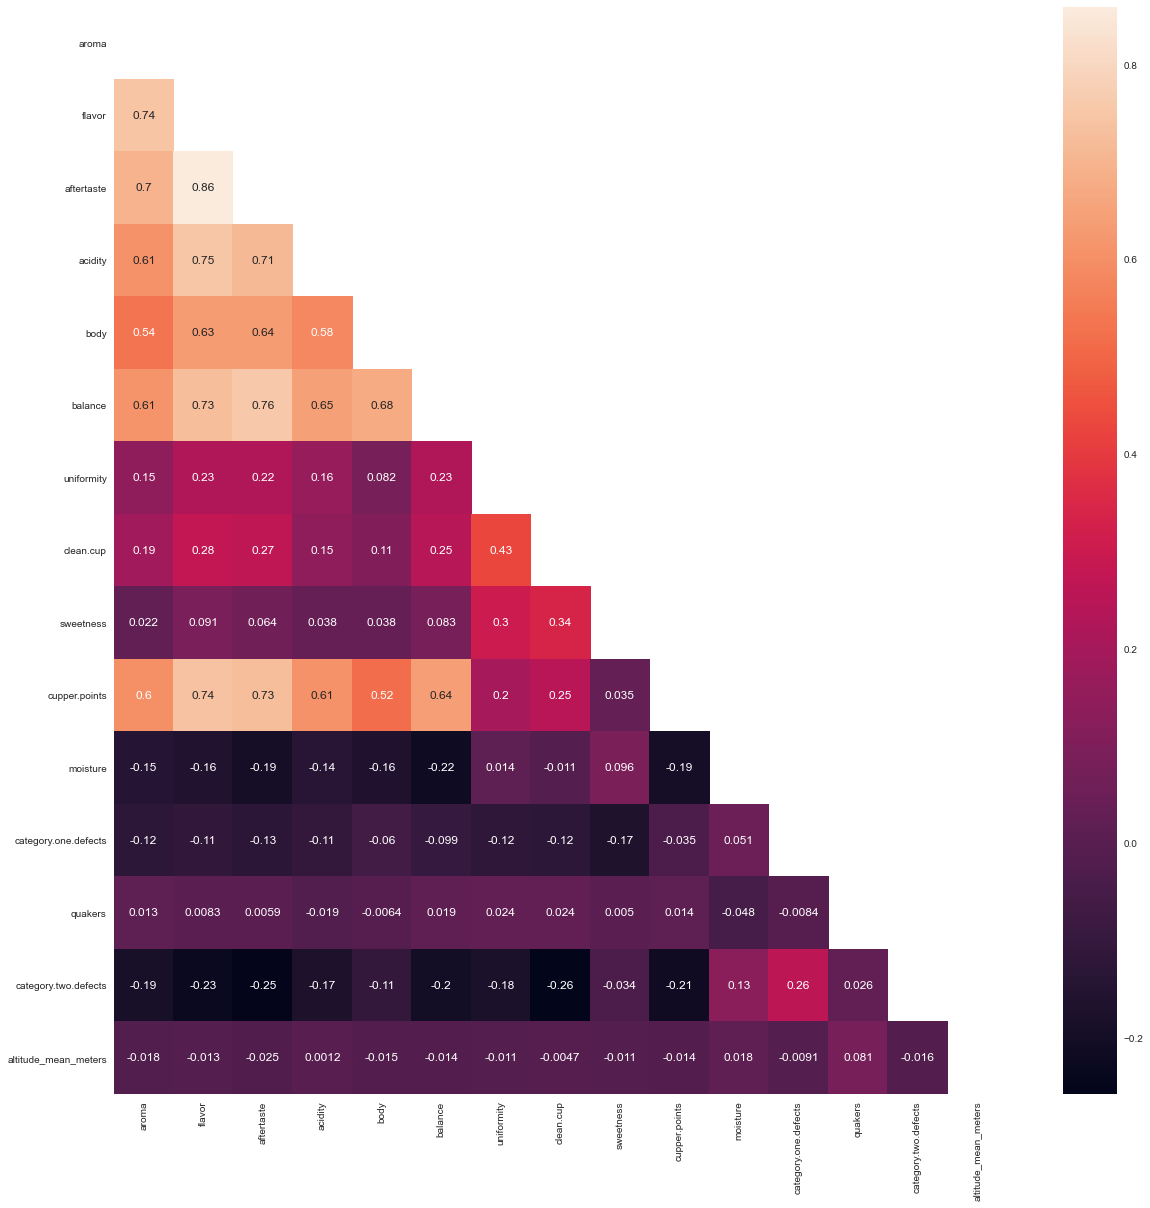

In [50]:
# checking for correlations
correlations_matrix = num.corr()
mask = np.zeros_like(correlations_matrix)

mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [51]:
num.corr()['cupper.points'].sort_values(ascending=False)

cupper.points           1.000000
flavor                  0.737808
aftertaste              0.727308
balance                 0.640118
acidity                 0.609971
aroma                   0.600666
body                    0.518180
clean.cup               0.249915
uniformity              0.201057
sweetness               0.034874
quakers                 0.013595
altitude_mean_meters   -0.013633
category.one.defects   -0.034509
moisture               -0.192749
category.two.defects   -0.211262
Name: cupper.points, dtype: float64

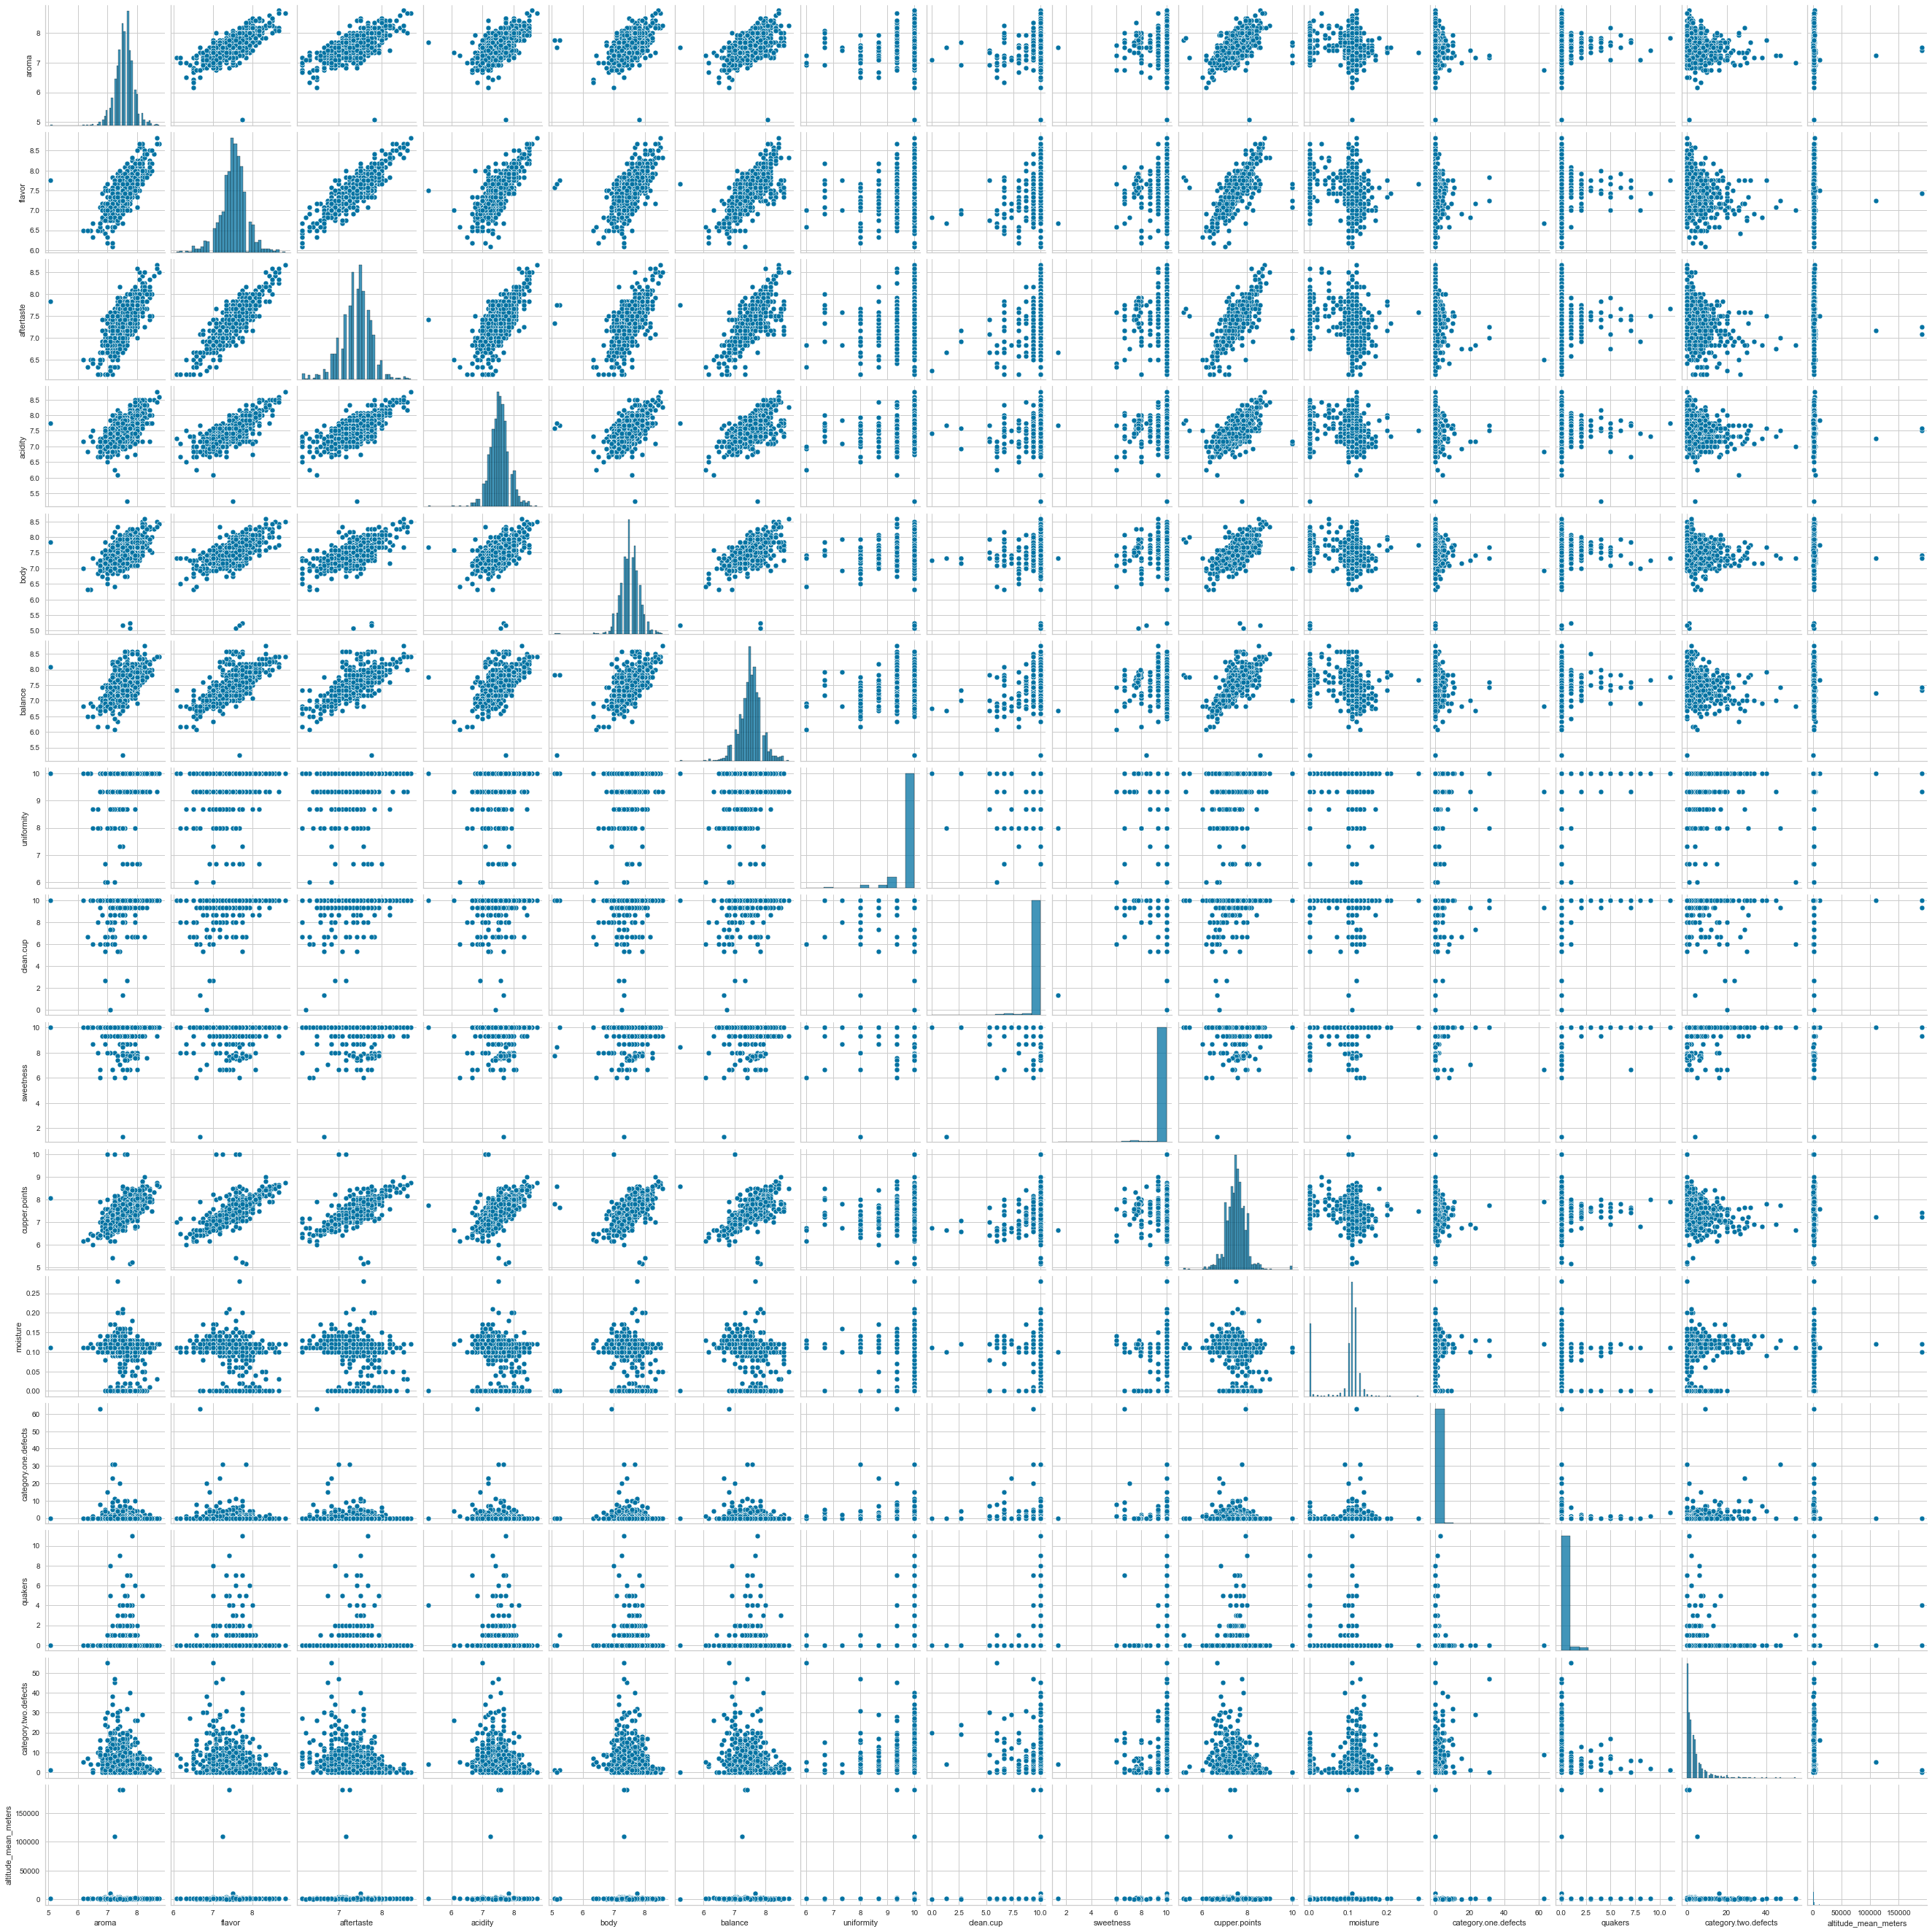

In [52]:
sns.pairplot(num)

The corrolation of flavor with other columns is quite high but I decided not to drop it because it also has a high correlation with the target column.

In [53]:
#function for boxploting all columns of a dataframe
def boxploting (df):
    for column in df:
        sns.boxplot(x=df[column]) 
        plt.show()

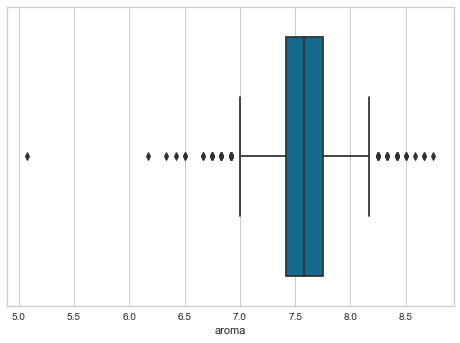

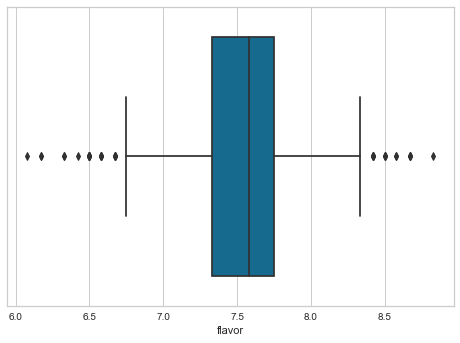

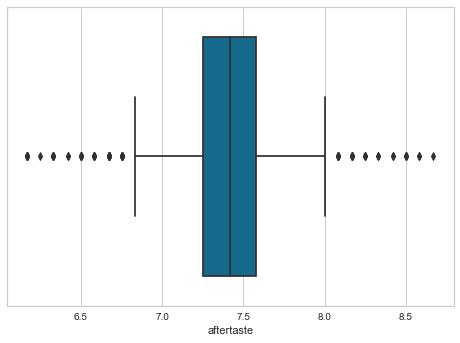

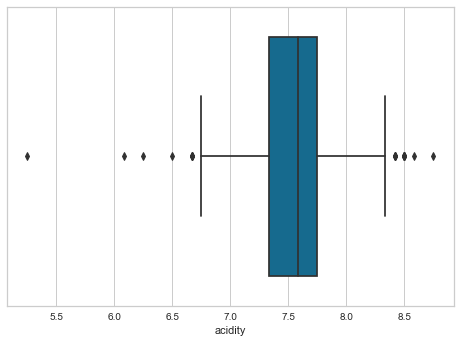

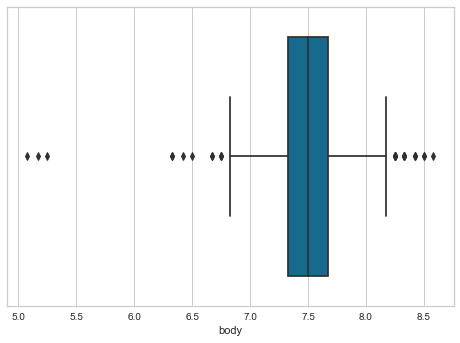

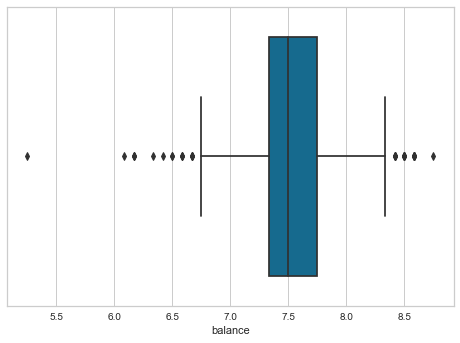

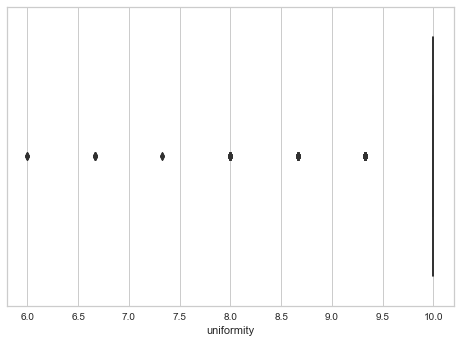

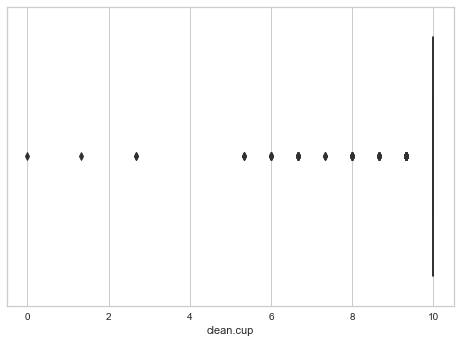

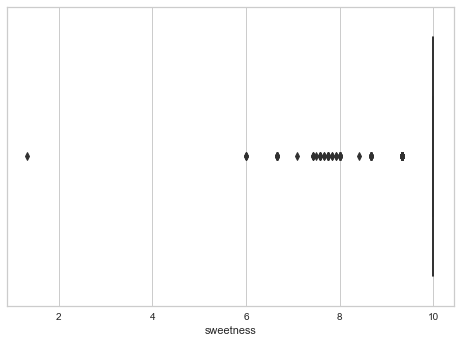

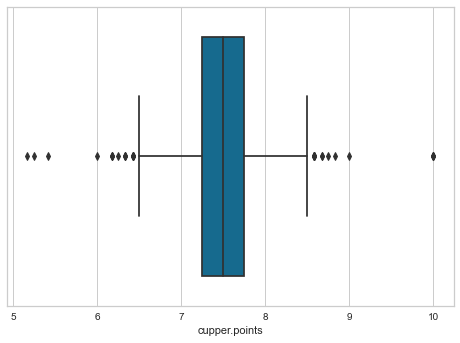

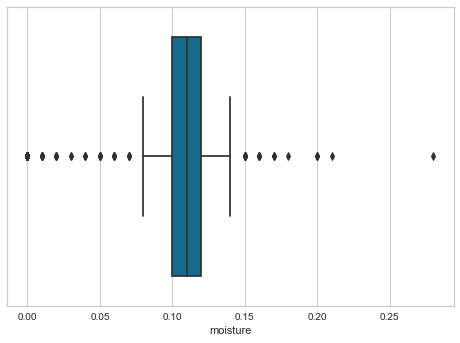

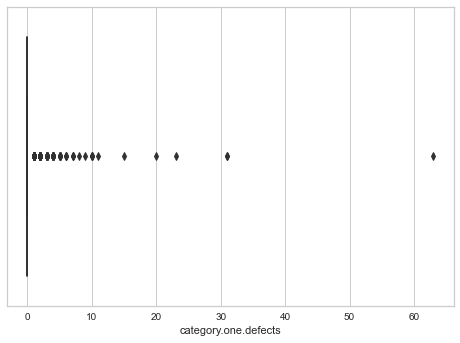

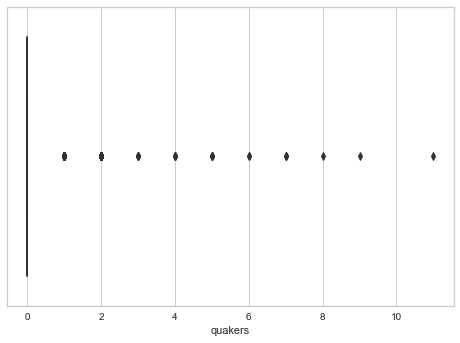

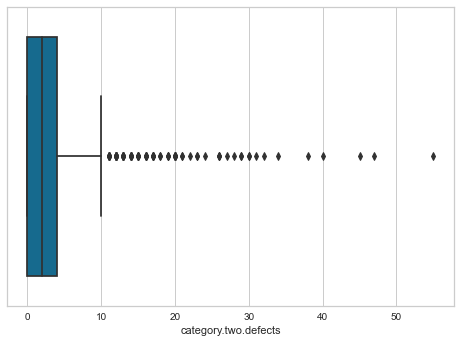

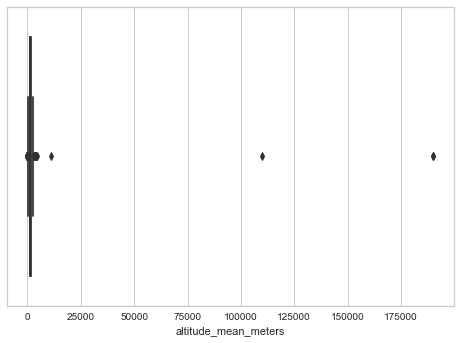

In [54]:
boxploting(num)

In [55]:
#function for distploting all columns of a dataframe
def distploting (df):
    for column in df:
        sns.distplot(df[column]) 
        plt.show()

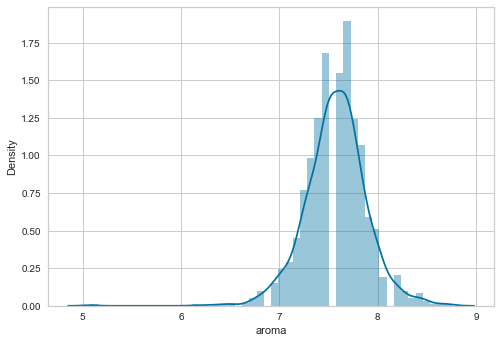

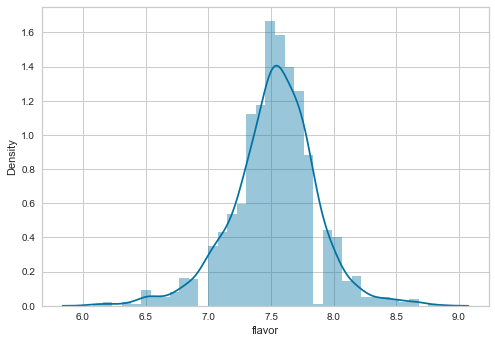

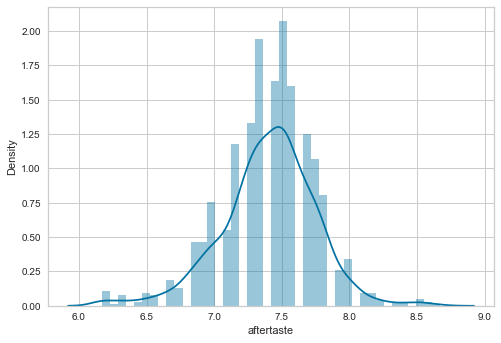

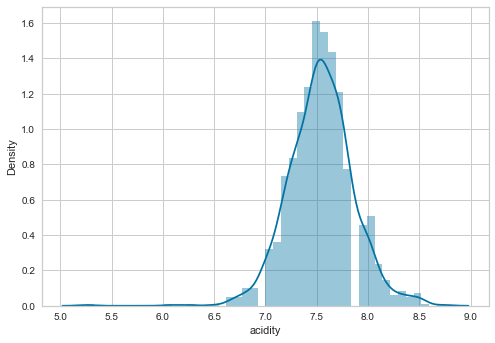

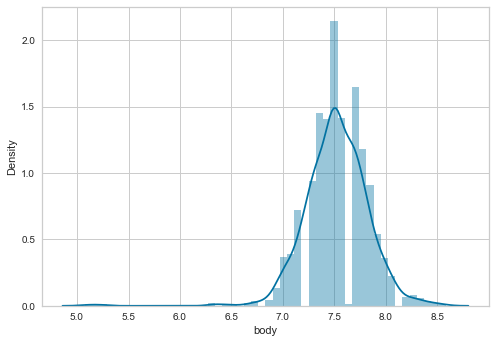

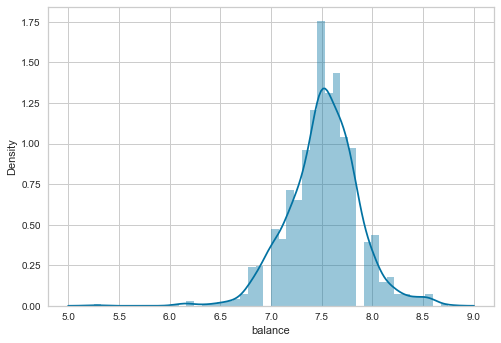

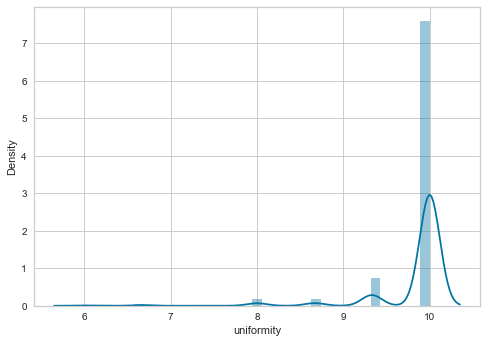

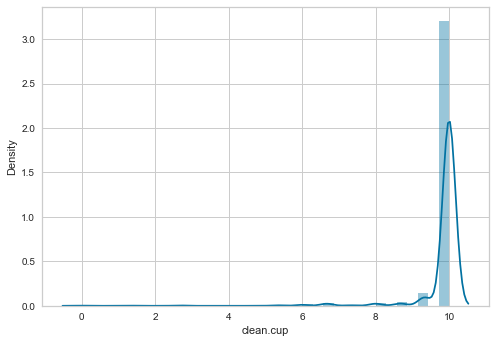

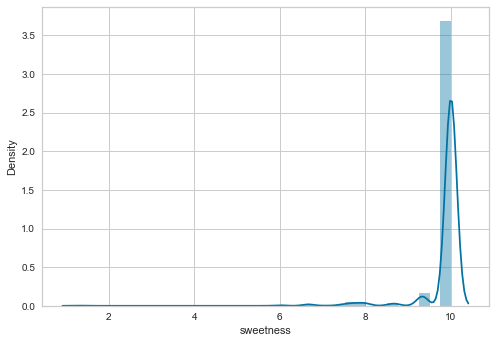

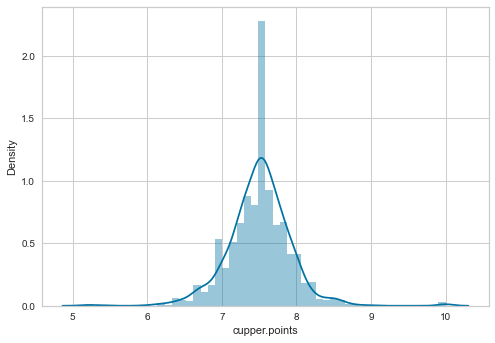

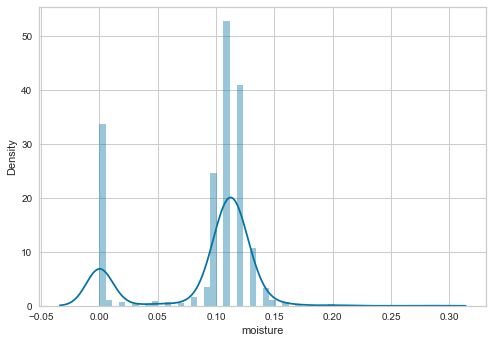

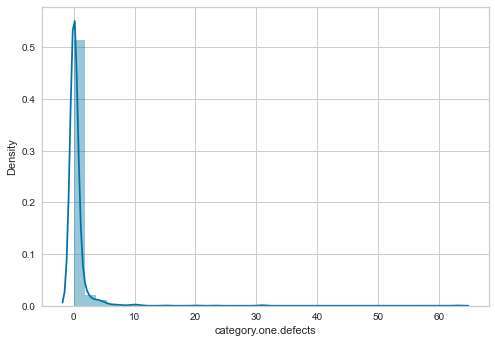

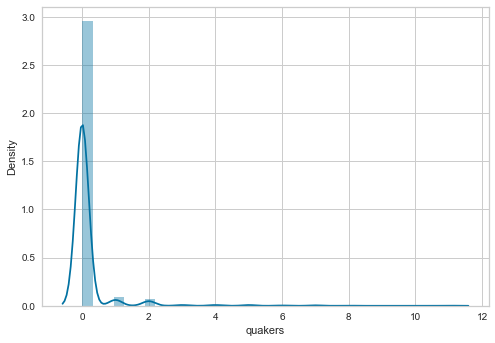

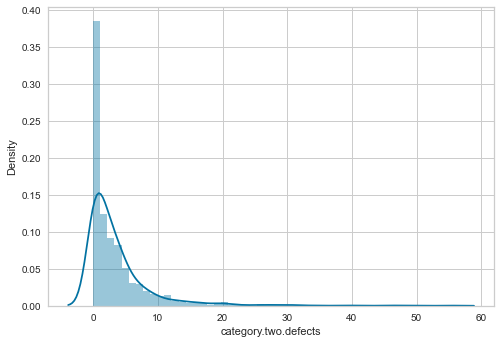

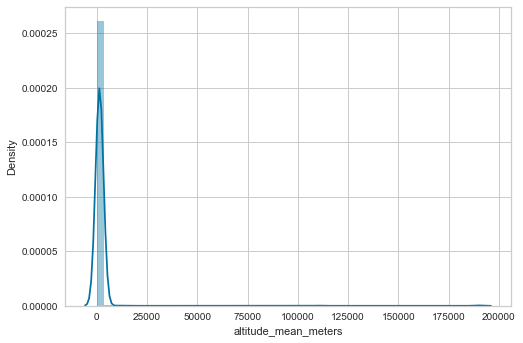

In [56]:
distploting(num)

In [57]:
def cleaning_outliers(lst,df):
    for i in lst:
        iqr = np.percentile(df[i],75) - np.percentile(df[i],25)
        upper_limit = np.percentile(df[i],75) + 2*iqr
        lower_limit = np.percentile(df[i],25) - 2*iqr
        df.loc[df[i]>upper_limit, i]=upper_limit
        df.loc[df[i]<lower_limit, i]=lower_limit

        sns.boxplot(x=df[i]) 
        plt.show()

In [58]:
lst = ['aroma','flavor','aftertaste','acidity','body','balance','moisture','altitude_mean_meters']

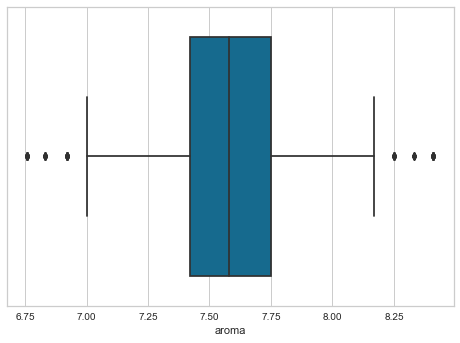

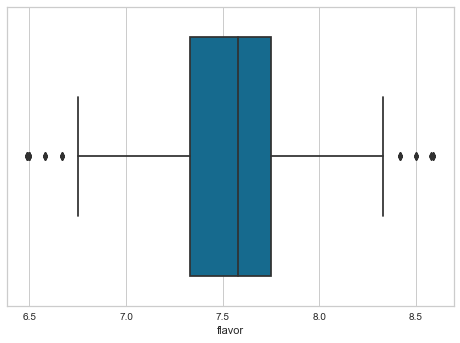

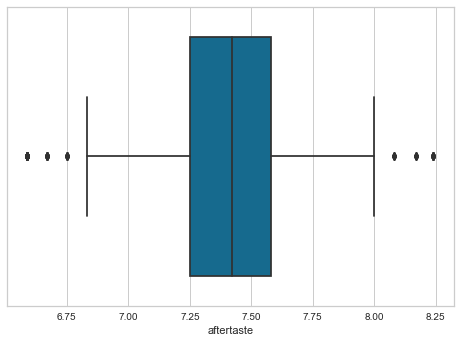

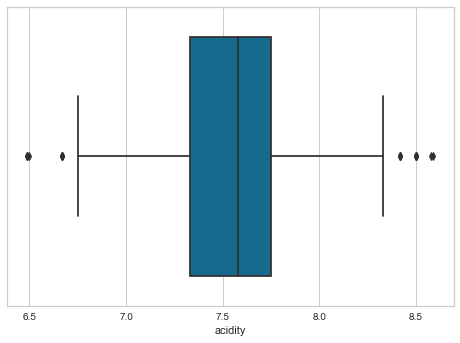

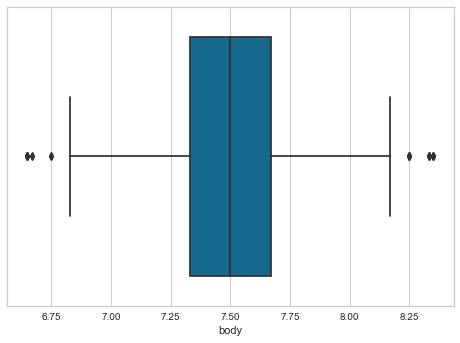

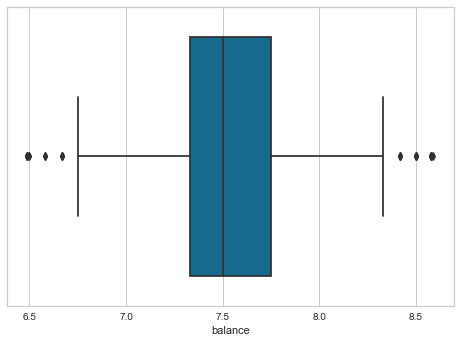

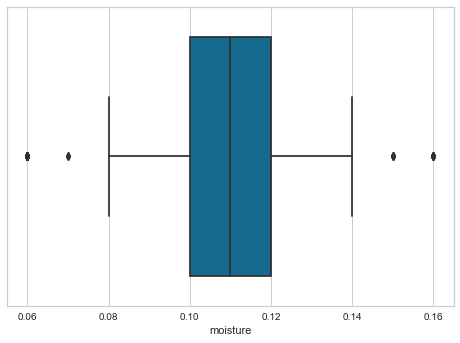

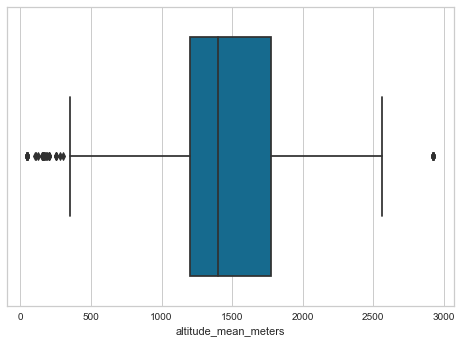

In [59]:
#reducing the outliers only in the columns that are in the list above
#the outliers in the other columns are important
cleaning_outliers(lst,num)

In [60]:
lst2 =['uniformity','clean.cup','sweetness','category.one.defects','quakers','category.two.defects']

In [61]:
for i in lst2:
    print(num[i].value_counts().sort_index())

6.00        3
6.67        7
7.33        2
8.00       25
8.67       26
9.33      106
10.00    1104
Name: uniformity, dtype: int64
0.00        1
1.33        1
2.67        2
5.33        3
6.00        6
6.67       13
7.33        3
8.00       13
8.67       14
9.33       52
10.00    1165
Name: clean.cup, dtype: int64
1.33        1
6.00        3
6.67        8
7.08        1
7.42        3
7.50        1
7.58        5
7.67        2
7.75        7
7.83        2
7.92        2
8.00       11
8.42        1
8.67       12
9.33       52
10.00    1162
Name: sweetness, dtype: int64
0     1084
1       96
2       34
3       15
4       16
5        9
6        3
7        3
8        1
9        1
10       4
11       1
15       1
20       1
23       1
31       2
63       1
Name: category.one.defects, dtype: int64
0     1182
1       38
2       30
3        5
4        5
5        5
6        2
7        3
8        1
9        1
11       1
Name: quakers, dtype: int64
0     343
1     196
2     174
3     128
4     115
5     

In the next steps I am reducing the unique values/ heavy outliers of the columns:

In [62]:
def clean_cod (x):
    if x>10:
        return 20
    else:
        return x

In [63]:
num['category.one.defects']= num['category.one.defects'].apply(clean_cod)

In [64]:
num['category.one.defects'].value_counts()

0     1084
1       96
2       34
4       16
3       15
5        9
20       7
10       4
7        3
6        3
9        1
8        1
Name: category.one.defects, dtype: int64

In [65]:
def clean_u (x):
    if x<7.00:
        return 7.00
    else:
        return x

In [66]:
num['uniformity']= num['uniformity'].apply(clean_u)

In [67]:
num['uniformity'].value_counts()

10.00    1104
9.33      106
8.67       26
8.00       25
7.00       10
7.33        2
Name: uniformity, dtype: int64

In [68]:
def clean_cc (x):
    if x<6.00:
        return 6.00
    else:
        return x

In [69]:
num['clean.cup']= num['clean.cup'].apply(clean_cc)

In [70]:
num['clean.cup'].value_counts()

10.00    1165
9.33       52
8.67       14
6.67       13
6.00       13
8.00       13
7.33        3
Name: clean.cup, dtype: int64

In [71]:
num['sweetness']= num['sweetness'].apply(clean_u)
num['sweetness'].value_counts()

10.00    1162
9.33       52
8.67       12
7.00       12
8.00       11
7.75        7
7.58        5
7.42        3
7.67        2
7.83        2
7.92        2
8.42        1
7.08        1
7.50        1
Name: sweetness, dtype: int64

In [72]:
def clean_q (x):
    if x>7:
        return 8
    else:
        return x

In [73]:
num['quakers']= num['quakers'].apply(clean_q)

In [74]:
def clean_ctd (x):
    if 10<x<20:
        return 15
    elif 20<x<30:
        return 25
    elif x>30:
        return 35        
    else:
        return x

In [75]:
num['category.two.defects']= num['category.two.defects'].apply(clean_ctd)

In [76]:
num['category.two.defects'].value_counts()

0     343
1     196
2     174
3     128
4     115
5      72
15     60
6      44
7      41
8      28
9      22
10     19
25     13
35      8
20      8
30      2
Name: category.two.defects, dtype: int64

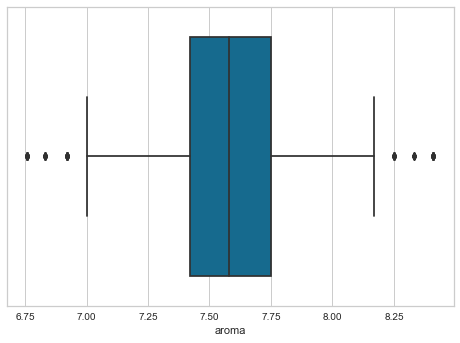

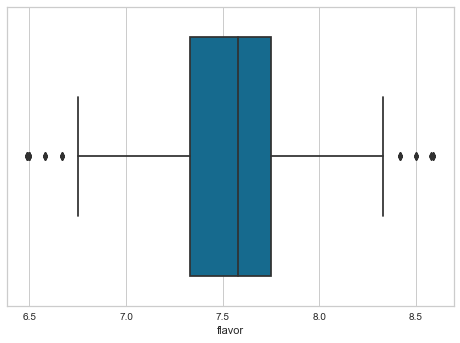

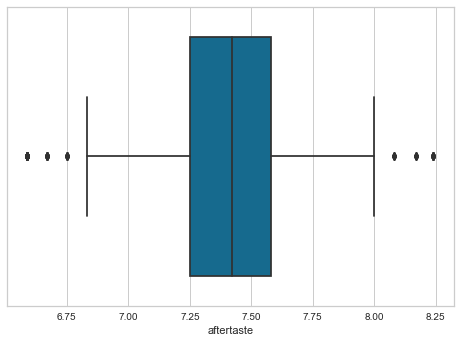

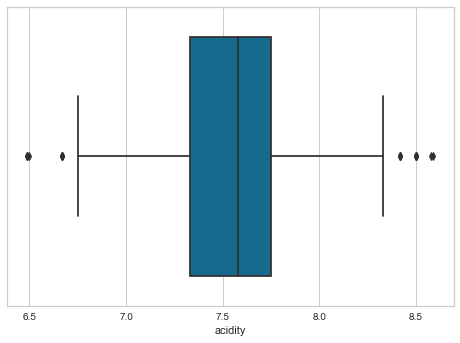

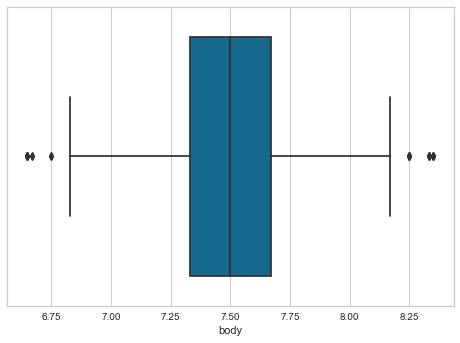

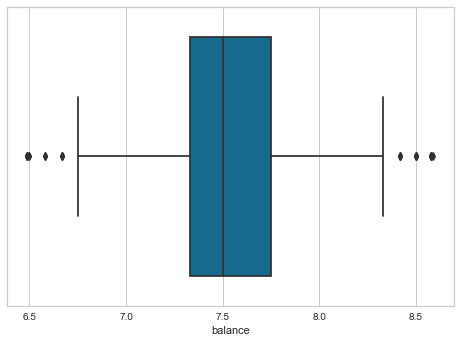

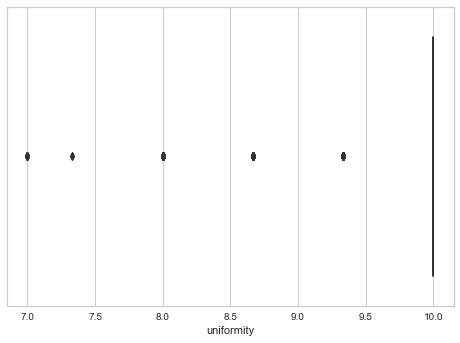

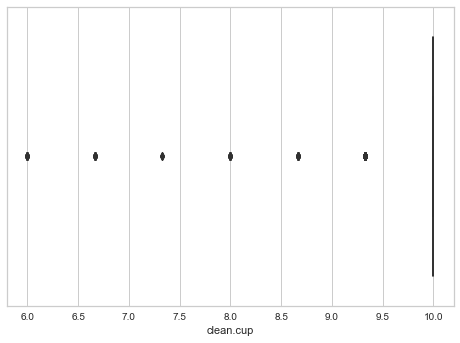

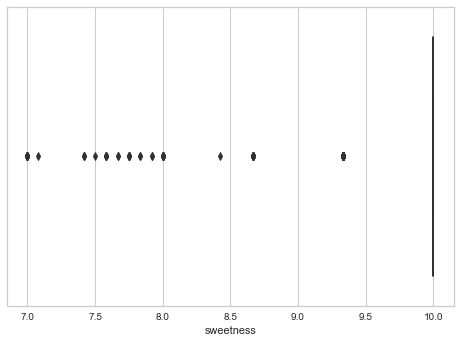

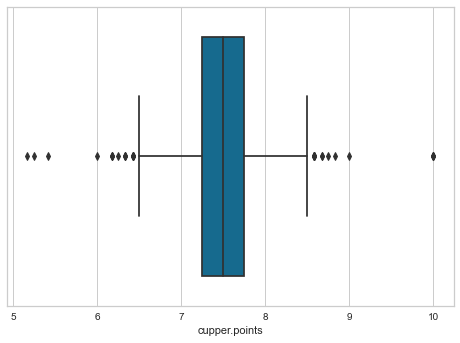

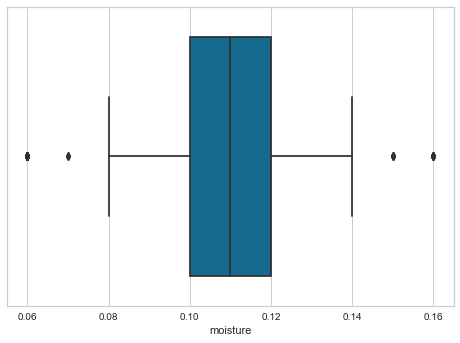

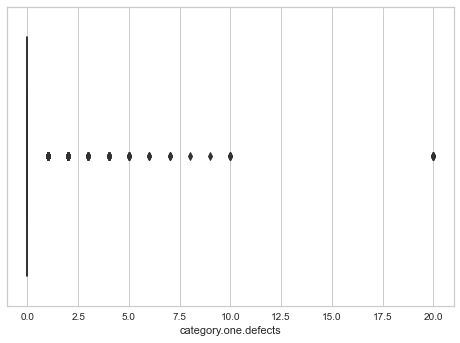

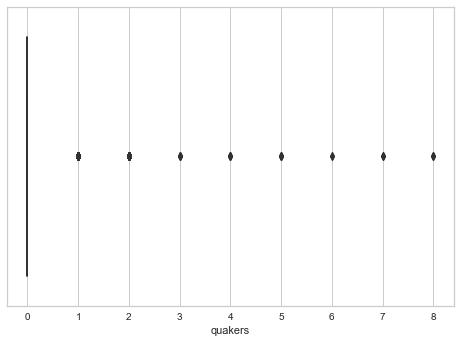

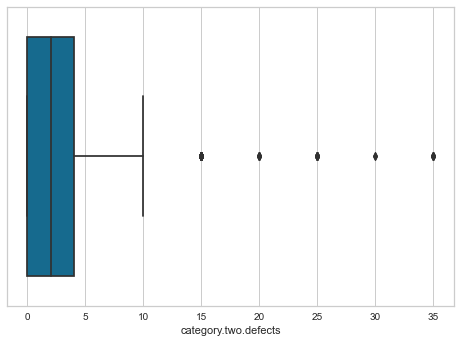

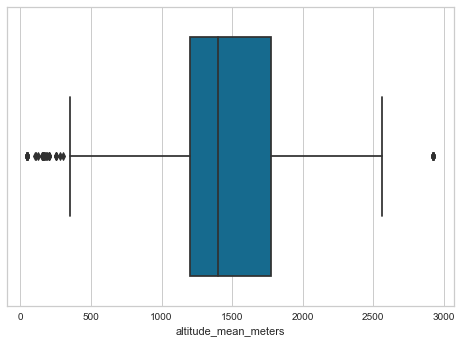

In [77]:
#checking cleaned datat
boxploting(num)

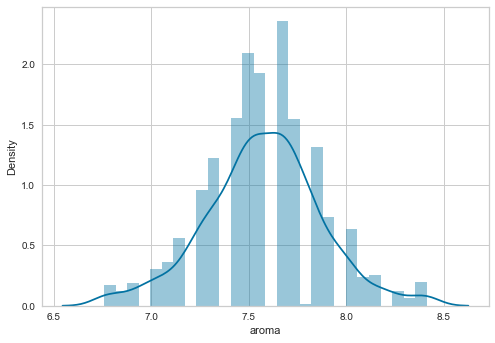

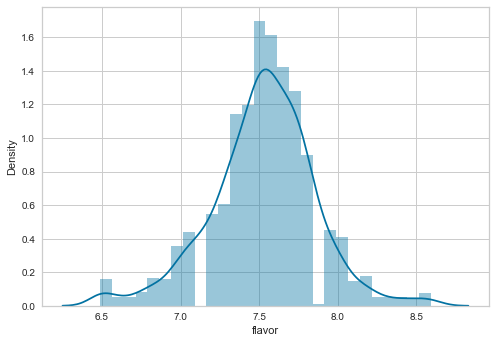

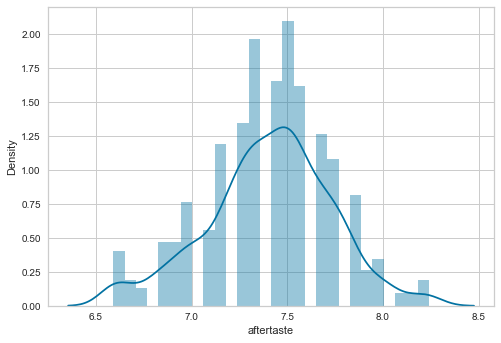

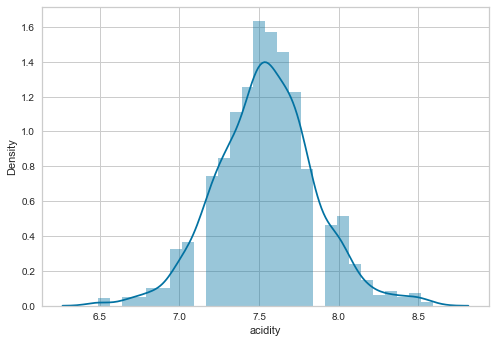

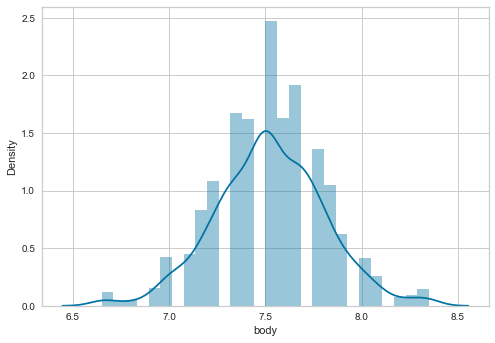

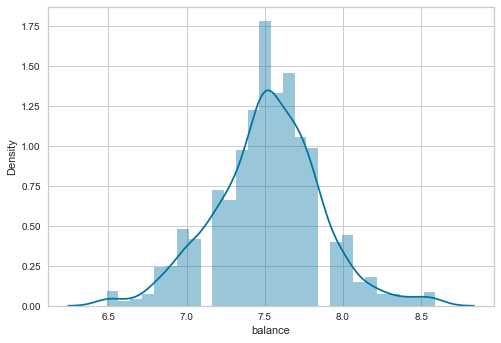

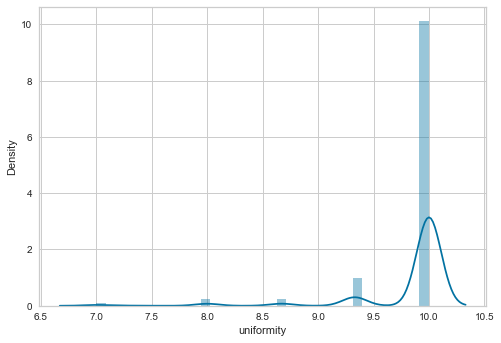

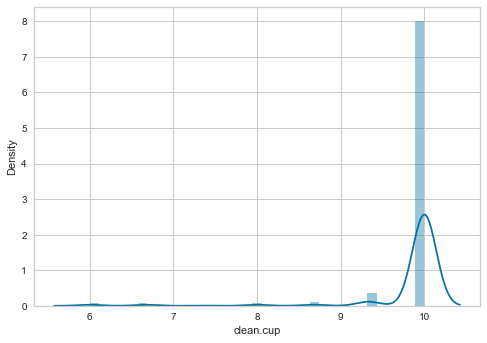

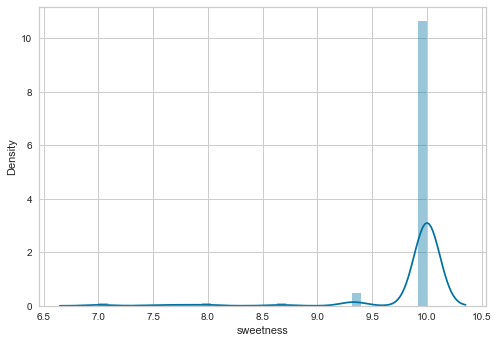

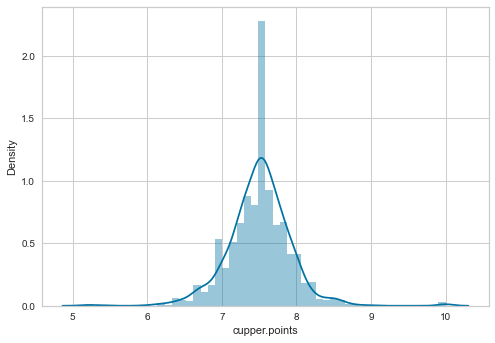

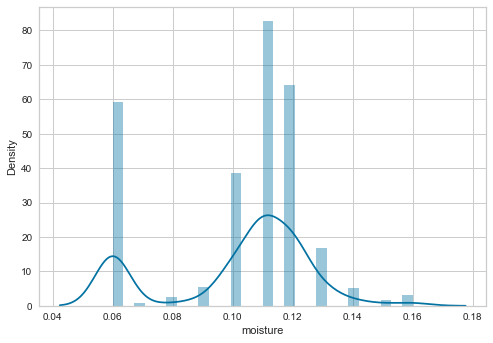

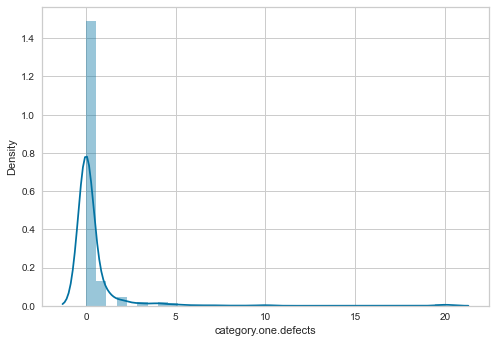

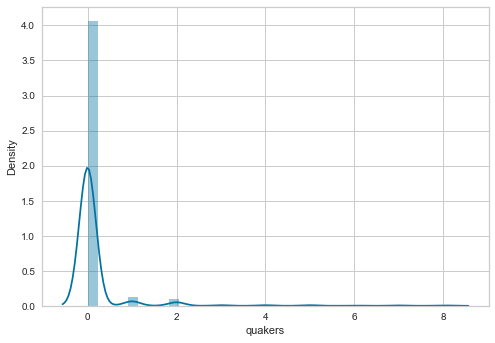

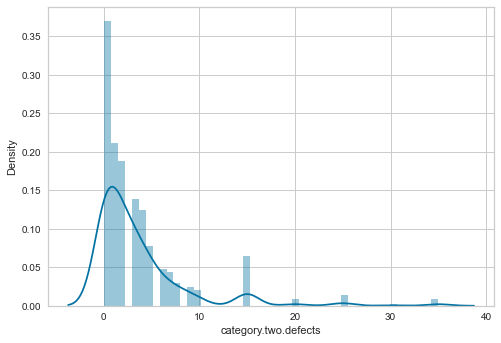

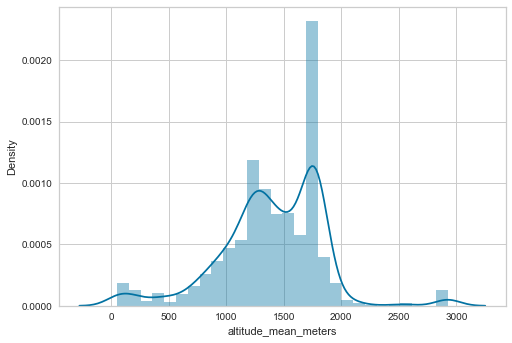

In [78]:
distploting(num)

In [79]:
num_column_names=[]
for column in num.columns:
    num_column_names.append(column)
num_column_names

['aroma',
 'flavor',
 'aftertaste',
 'acidity',
 'body',
 'balance',
 'uniformity',
 'clean.cup',
 'sweetness',
 'cupper.points',
 'moisture',
 'category.one.defects',
 'quakers',
 'category.two.defects',
 'altitude_mean_meters']

In [80]:
#checking p values

X_num_p = num.drop('cupper.points', axis=1)
y_p = num['cupper.points']


# with 'add_constant' we force the model to have an intercept
X_num_p = sm.add_constant(X_num_p)

model = sm.OLS(y_p,X_num_p).fit() # to train the model

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          cupper.points   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     134.0
Date:                Fri, 26 Nov 2021   Prob (F-statistic):          1.64e-237
Time:                        19:27:43   Log-Likelihood:                -139.39
No. Observations:                1273   AIC:                             308.8
Df Residuals:                    1258   BIC:                             386.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.5096 

In [81]:
#droping "body" & "quakers" because of high p value
num = num.drop(['body','quakers'], axis=1)

## Cleaned Dataset & X Y Split

In [82]:
data_clean = pd.concat([num, X_cat], axis=1)

In [83]:
X = data_clean.drop('cupper.points', axis=1)
y = data_clean['cupper.points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


X_train_num = X_train[['aroma','flavor','aftertaste','acidity','balance','uniformity','clean.cup','sweetness','moisture','category.one.defects','category.two.defects','altitude_mean_meters']]
X_test_num = X_test[['aroma','flavor','aftertaste','acidity','balance','uniformity','clean.cup','sweetness','moisture','category.one.defects','category.two.defects','altitude_mean_meters']]


X_train_cat = X_train.drop(['aroma','flavor','aftertaste','acidity','balance','uniformity','clean.cup','sweetness','moisture','category.one.defects','category.two.defects','altitude_mean_meters'], axis=1)
X_test_cat = X_test.drop(['aroma','flavor','aftertaste','acidity','balance','uniformity','clean.cup','sweetness','moisture','category.one.defects','category.two.defects','altitude_mean_meters'], axis=1)

# ,'body','quakers' einfügen

In [84]:
#reseting the index otherwise the concating of categoricals & transformed numericals had some issues
X_train_cat= X_train_cat.reset_index()
X_test_cat= X_test_cat.reset_index()

X_train_cat = X_train_cat.drop('index', axis=1)
X_test_cat = X_test_cat.drop('index', axis=1)

### StandardScaler

In [85]:
transformer_ss = StandardScaler().fit(X_train_num)

X_train_num_ss = pd.DataFrame(transformer_ss.transform(X_train_num))
X_test_num_ss = pd.DataFrame(transformer_ss.transform(X_test_num))

### Normalizer

In [86]:
transformer_norm = Normalizer().fit(X_train_num)

X_train_num_norm = pd.DataFrame(transformer_norm.transform(X_train_num))
X_test_num_norm = pd.DataFrame(transformer_norm.transform(X_test_num))

## 4.3 Concat dataframes

In [87]:
X_train_ss = pd.concat([X_train_num_ss, X_train_cat], axis=1)
X_test_ss = pd.concat([X_test_num_ss, X_test_cat], axis=1)

In [88]:
X_train_norm = pd.concat([X_train_num_norm, X_train_cat], axis=1)
X_test_norm = pd.concat([X_test_num_norm, X_test_cat], axis=1)

# 5. Modeling

## 5.1 Linear regression

In [89]:
#function for running linear regressions

def using_linear_regression (X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    predictions  = model.predict(X_test)
    
    print("R2_score:", round(r2_score(y_test, predictions),5)) 
    print("RMSE:", round(mean_squared_error(y_test, predictions),5))    

In [90]:
# categorical & numerical data
using_linear_regression(X_train_ss, y_train, X_test_ss, y_test)

R2_score: 0.50582
RMSE: 0.08426


In [91]:
# only numerical data
using_linear_regression(X_train_num_ss, y_train, X_test_num_ss, y_test)

R2_score: 0.59236
RMSE: 0.0695


In [92]:
# categorical & numerical data
using_linear_regression(X_train_norm, y_train, X_test_norm, y_test)

R2_score: -0.02793
RMSE: 0.17526


In [93]:
# only numerical data
using_linear_regression(X_train_num_norm, y_train, X_test_num_norm, y_test)

R2_score: -0.28452
RMSE: 0.21901


## 5.2 Decision Tree Regressor

In [94]:
#function for running the decision tree regressor

def using_des_tree_reg (X_train, y_train, X_test, y_test):
    model = DecisionTreeRegressor()
    model.fit(X_train,y_train)
    
    predictions  = model.predict(X_test)
    
    print("R2_score:", round(r2_score(y_test, predictions),5)) 
    print("RMSE:", round(mean_squared_error(y_test, predictions),5))   

In [95]:
# categorical & numerical data
using_des_tree_reg(X_train_ss, y_train, X_test_ss, y_test)

R2_score: 0.35193
RMSE: 0.1105


In [96]:
# only numerical data
using_des_tree_reg(X_train_num_ss, y_train, X_test_num_ss, y_test)

R2_score: 0.22058
RMSE: 0.13289


In [97]:
# categorical & numerical data
using_des_tree_reg(X_train_norm, y_train, X_test_norm, y_test)

R2_score: 0.0834
RMSE: 0.15628


In [98]:
# only numerical data
using_des_tree_reg(X_train_num_norm, y_train, X_test_num_norm, y_test)

R2_score: -0.25108
RMSE: 0.21331


## 5.3 KNNRegressor

In [99]:
##function for running the KNNRegressor

def using_kn_reg (X_train, y_train, X_test, y_test):
    model = KNeighborsRegressor()
    model.fit(X_train,y_train)
    
    predictions  = model.predict(X_test)
    
    print("R2_score:", round(r2_score(y_test, predictions),5)) 
    print("RMSE:", round(mean_squared_error(y_test, predictions),5))   

In [100]:
# categorical & numerical data
using_kn_reg(X_train_ss, y_train, X_test_ss, y_test)

R2_score: 0.59494
RMSE: 0.06906


In [101]:
# only numerical data
using_kn_reg(X_train_num_ss, y_train, X_test_num_ss, y_test)

R2_score: 0.53835
RMSE: 0.07871


In [102]:
# categorical & numerical data
using_kn_reg(X_train_norm, y_train, X_test_norm, y_test)

R2_score: 0.19808
RMSE: 0.13673


In [103]:
# only numerical data
using_kn_reg(X_train_num_norm, y_train, X_test_num_norm, y_test)

R2_score: 0.06487
RMSE: 0.15944


## 5.4 RandomForestRegressor

In [104]:
##function for running the random forest regressor

def using_rf_reg (X_train, y_train, X_test, y_test):
    model = RandomForestRegressor(n_estimators=15, max_depth = 5, random_state=0)
    model.fit(X_train,y_train)
    
    predictions  = model.predict(X_test)
    
    print("R2_score:", round(r2_score(y_test, predictions),5)) 
    print("RMSE:", round(mean_squared_error(y_test, predictions),5))

In [105]:
# categorical & numerical data
using_rf_reg(X_train_ss, y_train, X_test_ss, y_test)

R2_score: 0.67772
RMSE: 0.05495


In [106]:
# only numerical data
using_rf_reg(X_train_num_ss, y_train, X_test_num_ss, y_test)

R2_score: 0.6829
RMSE: 0.05407


In [107]:
# categorical & numerical data
using_rf_reg(X_train_norm, y_train, X_test_norm, y_test)

R2_score: 0.28889
RMSE: 0.12124


In [108]:
# only numerical data
using_rf_reg(X_train_num_norm, y_train, X_test_num_norm, y_test)

R2_score: 0.29781
RMSE: 0.11972


The transformed data with the StandardScaler perfomed way better than the normalizes data.
The best Regressor was the Random Forest Regressor with the only numerical dataset. That's way I explored the most important columns for that specific test.

In [109]:
# looking at the most important column for this Regressor

model_rf = RandomForestRegressor(n_estimators=15, max_depth = 5, random_state=0)
model_rf.fit(X_train_ss, y_train)
feature_list = list(X_train_ss.columns)

# getting numerical importance
importances = list(model_rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable:                    1 Importance: 0.37
Variable:                    2 Importance: 0.25
Variable:                    4 Importance: 0.19
Variable: owner_aulia arif syahri Importance: 0.04
Variable:                    0 Importance: 0.02
Variable: harvest.year_2017    Importance: 0.02
Variable:                    3 Importance: 0.01
Variable:                   11 Importance: 0.01
Variable: owner_cqi taiwan icp cqi台灣合作夥伴 Importance: 0.01
Variable: owner_lydiah mwangi  Importance: 0.01
Variable: country.of.origin_Vietnam Importance: 0.01
Variable: variety_SL28         Importance: 0.01
Variable: processing.method_Other Importance: 0.01
Variable: color_Green          Importance: 0.01
Variable:                    5 Importance: 0.0
Variable:                    6 Importance: 0.0
Variable:                    7 Importance: 0.0
Variable:                    8 Importance: 0.0
Variable:                    9 Importance: 0.0
Variable:                   10 Importance: 0.0
Variable: species_Robusta

#### The most important columns are column 1 (flavor), column 2 (aftertaste) and column 4 (balance).

In [110]:
# pulling out one tree from the forest

tree = model_rf.estimators_[5]

# exporting the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# using dot file to create a graph
(graph,) = pydot.graph_from_dot_file('tree.dot')

# writing graph to a png file
graph.write_png('tree.png')

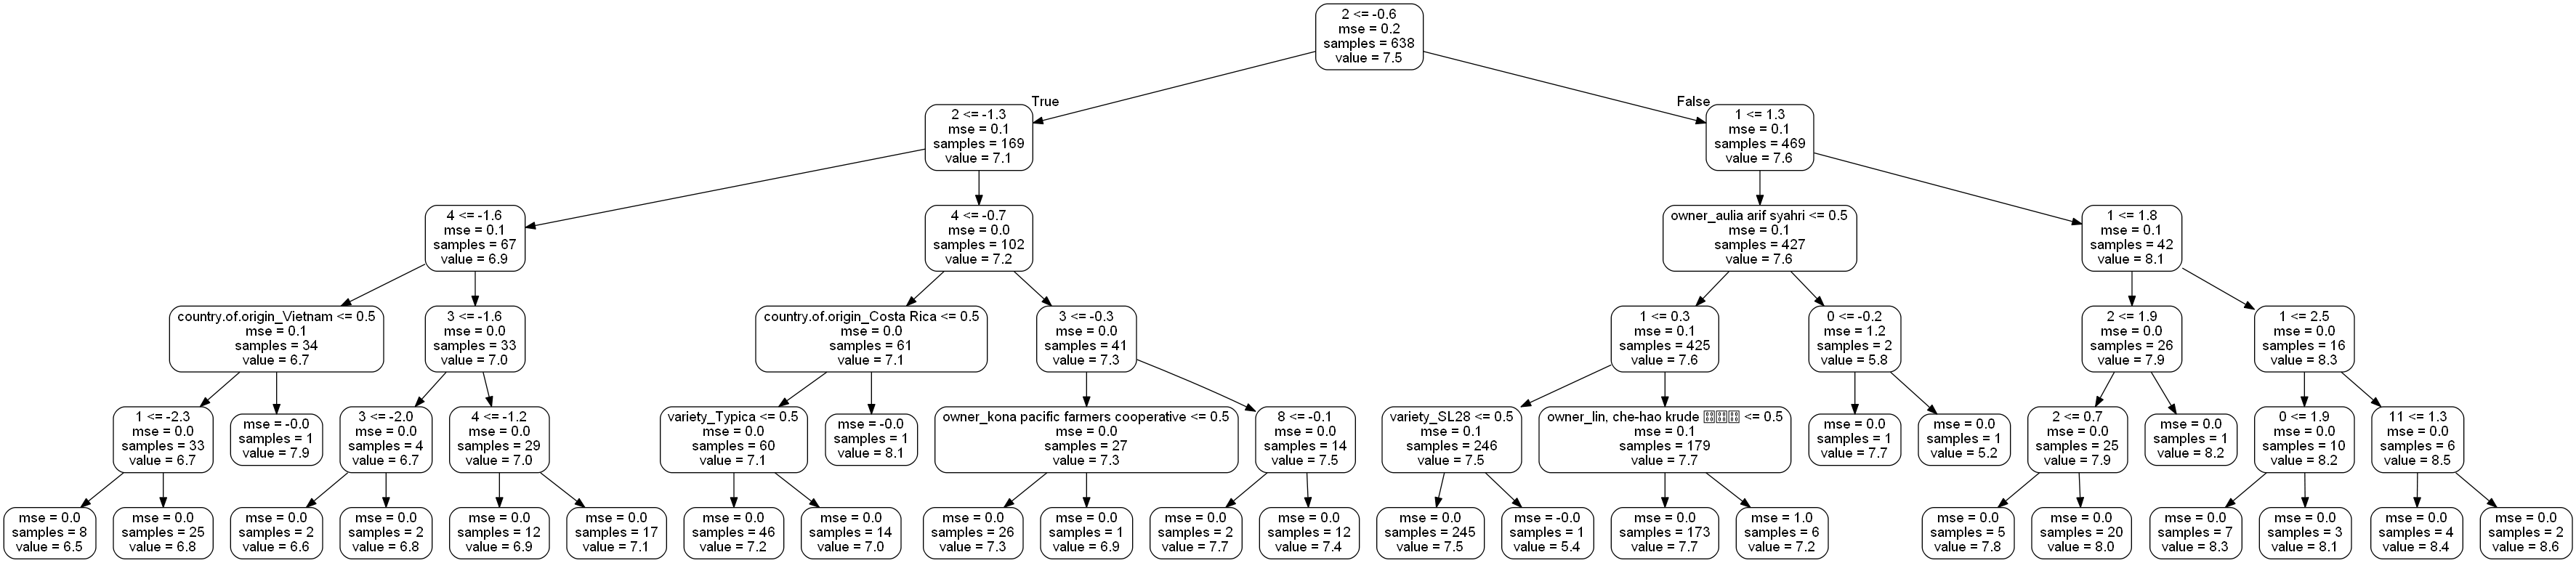

In [111]:
Image(filename = 'tree.png')

# 6. Clustering

In [112]:
# creating clusters

kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_train_num_ss)

KMeans(n_clusters=6, random_state=42)

In [113]:
# predicting / assigning the clusters:)
clusters = kmeans.predict(X_train_num_ss)
clusters

array([0, 3, 4, ..., 1, 3, 1])

In [114]:
pd.Series(clusters).value_counts().sort_index()

0    163
1    198
2     34
3    437
4    181
5      5
dtype: int64

In [115]:
# exploring the cluster assignment in the original dataset
X_df = pd.DataFrame(X_train_num).copy()
X_df["cluster"] = clusters
X_df.head()

,aroma,flavor,aftertaste,acidity,balance,uniformity,clean.cup,sweetness,moisture,category.one.defects,category.two.defects,altitude_mean_meters,cluster
516,7.58,7.75,7.42,7.67,7.42,10.00,10.0,10.0,0.06,0,2,1000.000000,0
428,7.83,7.50,7.67,7.33,7.67,10.00,10.0,10.0,0.11,0,1,1750.000000,3
165,7.92,7.83,7.67,8.00,7.75,10.00,10.0,10.0,0.11,0,0,2000.000000,4
687,7.58,7.58,7.58,7.75,7.58,9.33,10.0,10.0,0.06,0,3,1775.030545,0
811,7.33,7.33,7.33,7.50,7.67,10.00,10.0,10.0,0.11,0,3,1775.030545,3


In [116]:
# "performance metric"
kmeans.inertia_

6457.685195680031

In [117]:
kmeans = KMeans(n_clusters=2, random_state=1234, verbose=1, n_init=1)
kmeans.fit(X_train_num_ss)
kmeans.inertia_

Initialization complete
Iteration 0, inertia 15117.288626087571
Iteration 1, inertia 9910.172309953117
Iteration 2, inertia 9779.323438066893
Iteration 3, inertia 9746.643882901953
Iteration 4, inertia 9720.52462879752
Iteration 5, inertia 9697.552726545056
Iteration 6, inertia 9689.24734895263
Iteration 7, inertia 9685.78850919075
Iteration 8, inertia 9684.004089169968
Iteration 9, inertia 9682.252769114177
Iteration 10, inertia 9680.75269457871
Iteration 11, inertia 9677.861798680795
Iteration 12, inertia 9673.556603619674
Iteration 13, inertia 9669.629554451716
Iteration 14, inertia 9665.638799288085
Iteration 15, inertia 9665.001706402076
Iteration 16, inertia 9664.872763023735
Converged at iteration 16: center shift 5.645243019393364e-05 within tolerance 0.00010000000000000007.


9664.79153481174

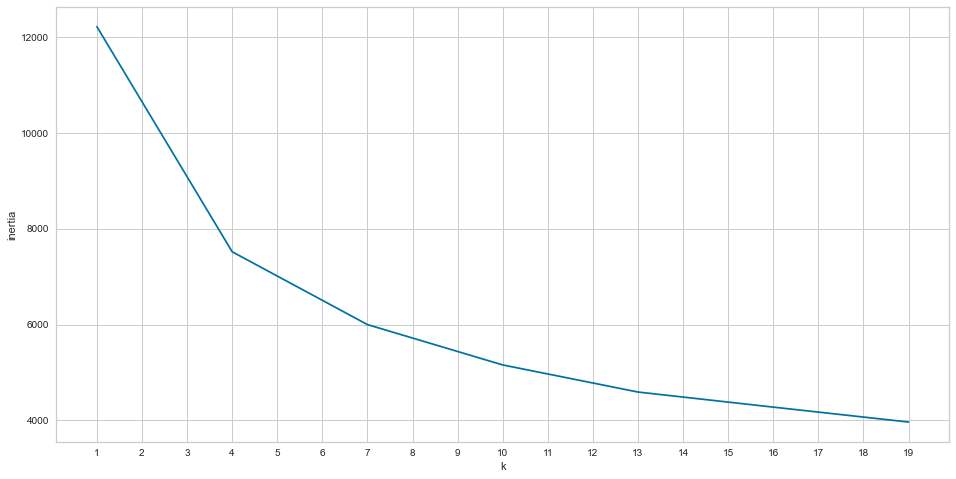

In [118]:
K = range(1, 20, 3)

inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X_train_num_ss)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

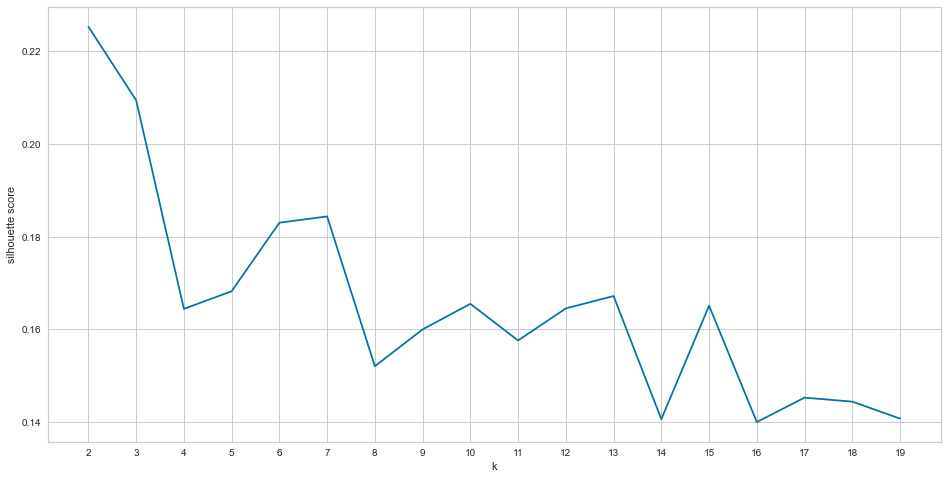

In [119]:
# choosing 6 cluster because of the "high" silhouette score; 7 clusters disn't worked oute so well

K = range(2, 20)

silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_num_ss)
    silhouette.append(silhouette_score(X_train_num_ss, kmeans.predict(X_train_num_ss)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()

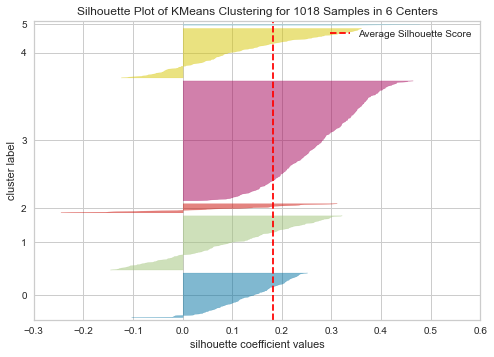

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1018 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [120]:
# Specify the features to use for clustering
features = ['aroma','flavor','aftertaste','acidity','balance','uniformity','clean.cup','sweetness','moisture','category.one.defects','category.two.defects','altitude_mean_meters']

# Instantiate the clustering model and visualizer
model = KMeans(6, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X_train_num_ss)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [121]:
#ploting all the culumns grouped by clusters to see similarities
def countplot_columns(df, group):
    
    for i in df.columns:
        sns.countplot(x = i, hue = group, data = df, palette = 'rainbow' )
        results = plt.show()
    return results

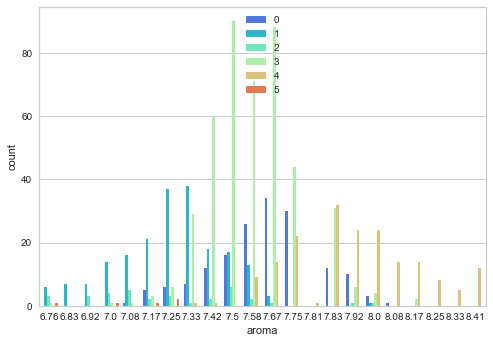

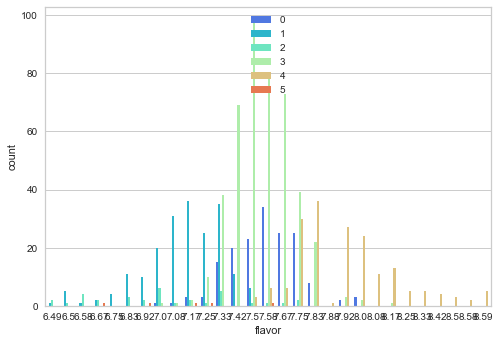

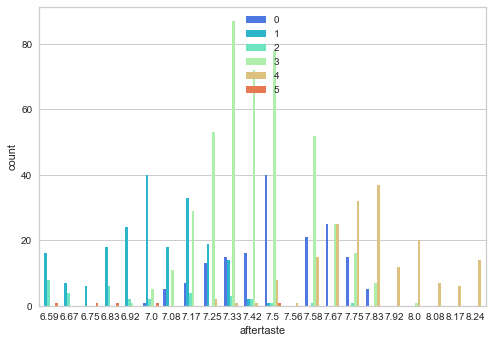

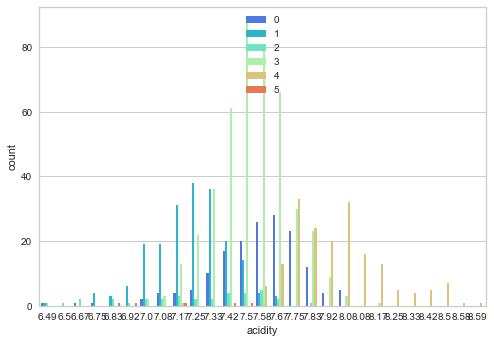

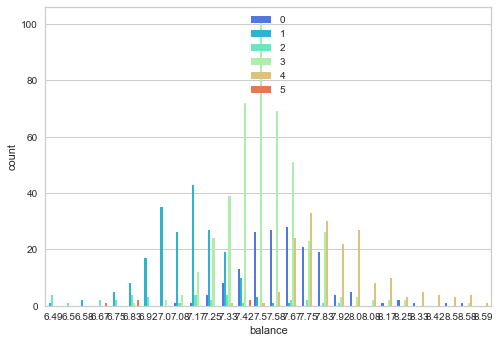

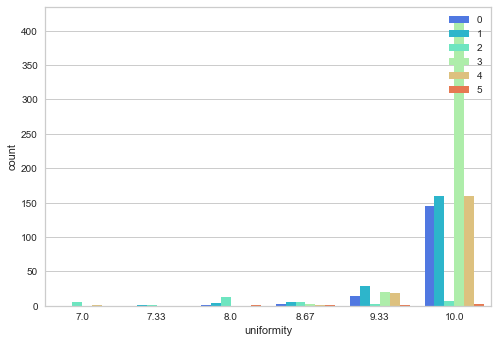

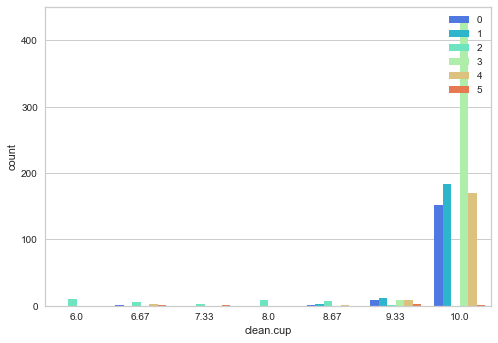

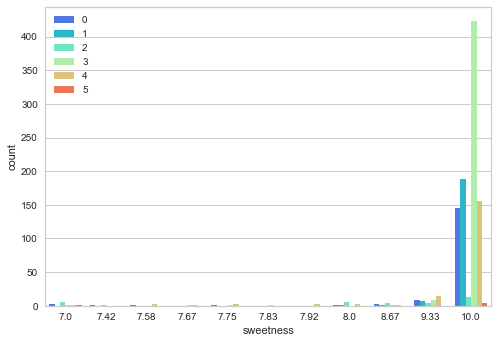

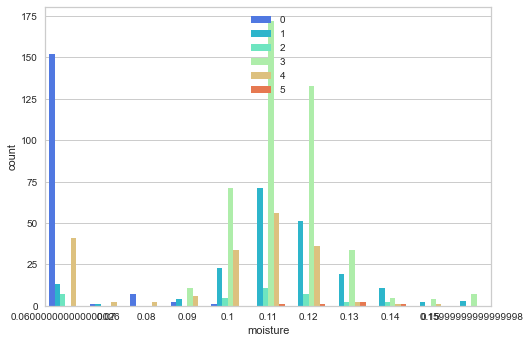

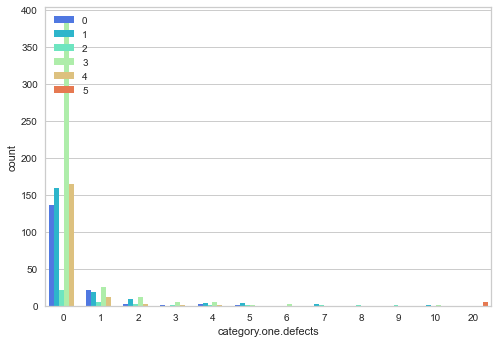

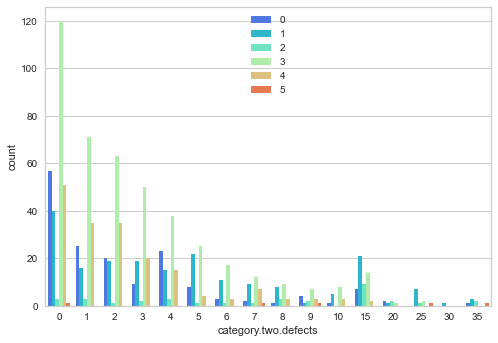

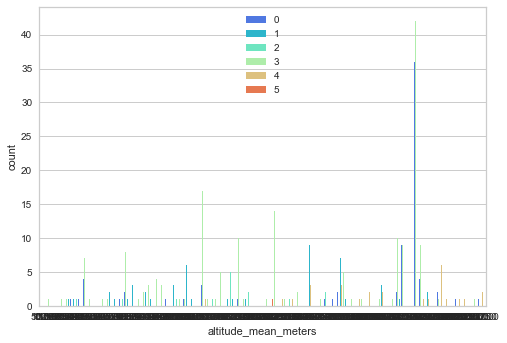

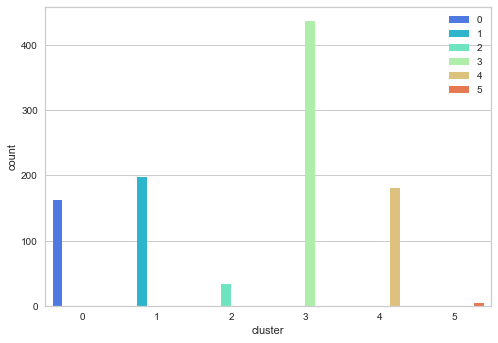

In [122]:
countplot_columns(X_df, clusters)

<AxesSubplot:xlabel='aroma', ylabel='aftertaste'>

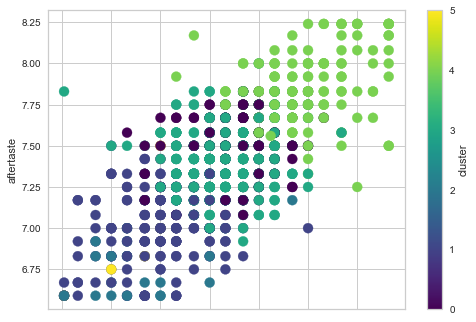

In [123]:
X_df.plot.scatter(x="aroma", y="aftertaste", c="cluster", cmap="viridis", s=100)

<AxesSubplot:xlabel='aroma', ylabel='clean.cup'>

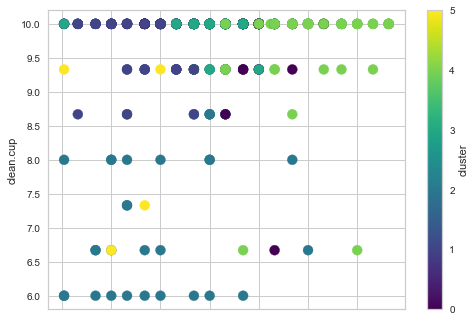

In [124]:
X_df.plot.scatter(x="aroma", y="clean.cup", c="cluster", cmap="viridis", s=100)

<AxesSubplot:xlabel='clean.cup', ylabel='category.one.defects'>

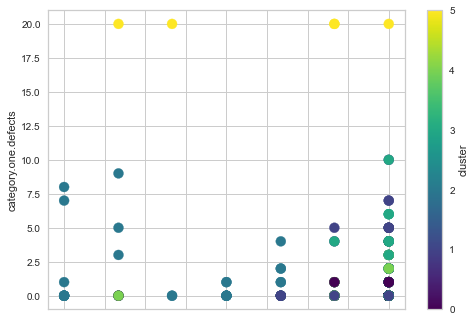

In [125]:
X_df.plot.scatter(x="clean.cup", y="category.one.defects", c="cluster", cmap="viridis", s=100)

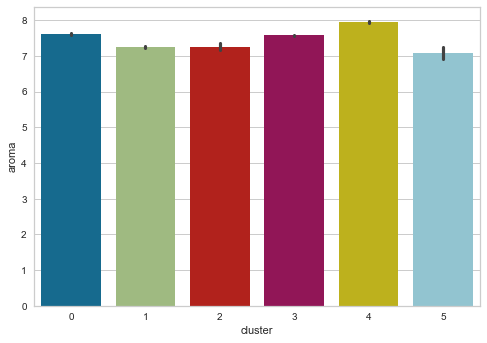

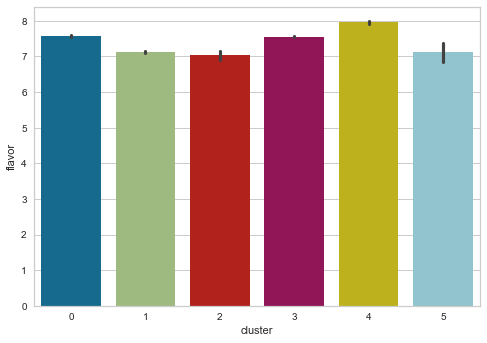

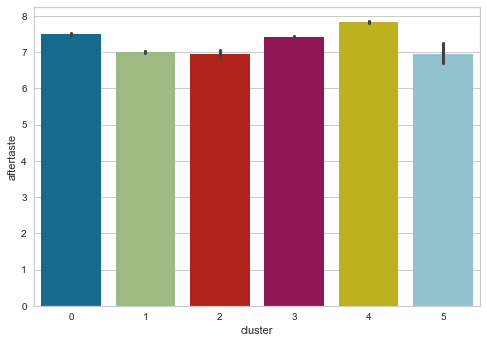

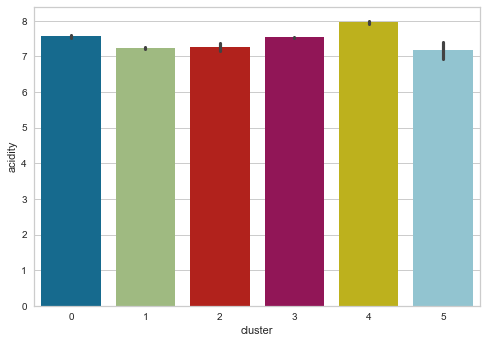

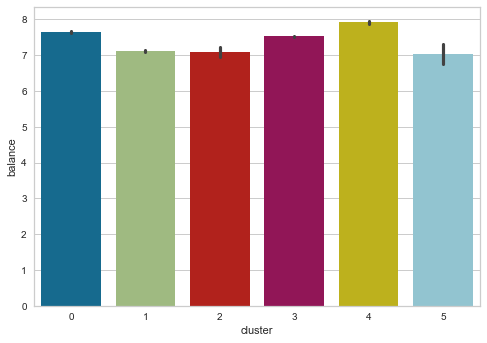

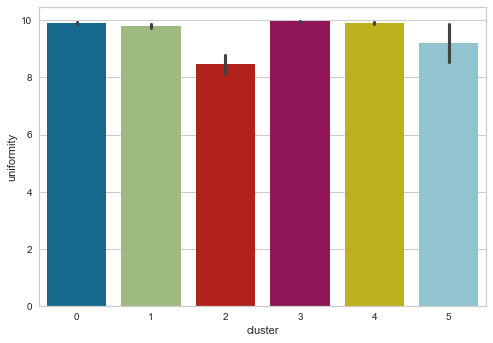

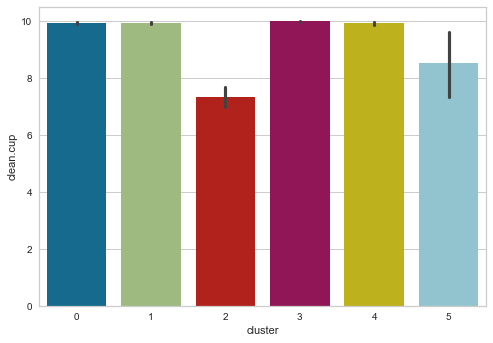

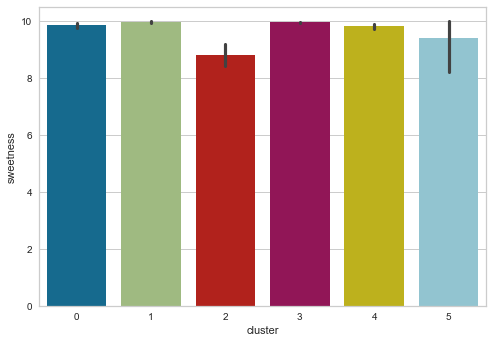

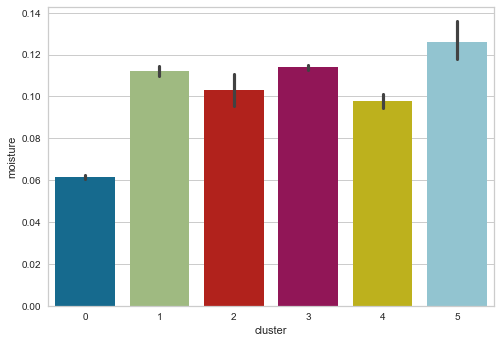

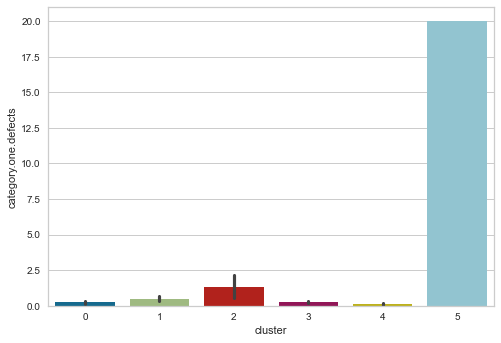

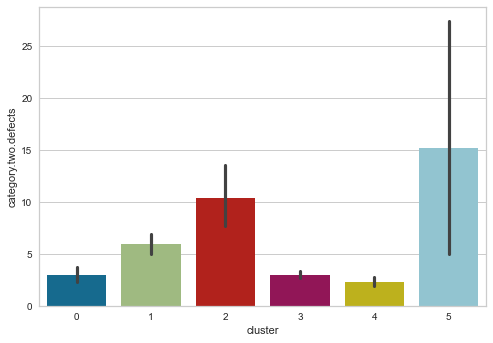

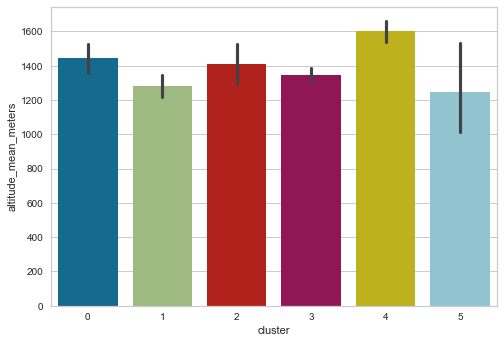

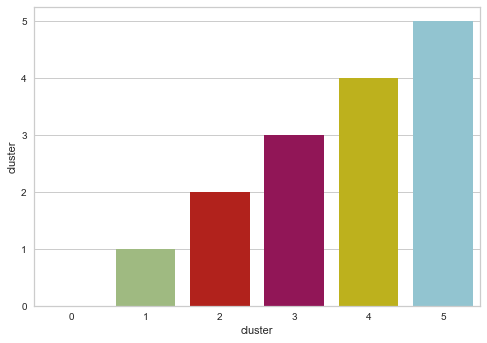

In [126]:
for i in X_df.columns:
    sns.barplot(x="cluster", y=i, data=X_df)
    plt.show()